# Who feeds the world ? And how wealthy are they ?
There are **folium maps** in this notebook. If they do not display or do not display well, we suggest you to **have a look at the `.html` file** that is located the same repository.

## Abstract <a name="abstract"></a>

Are countries that plant more maize richer than countries planting rice? Is it true that developed countries produce more meat? Are you better off being a food net exporter or importer? Are food prices more stable if you produce more food locally or trade more?

In this project we analyze **the effects that a country agricultural sector has on its different economic indicators**. The indicators of the agricultural sector we used are crops and livestock **production, exports and imports** of **crops, livestock and live animals**. For these, we use the data from the "**Global Food & Agriculture Statistics**" datasets. We quantify the **economic success** by **Gross Domestic Product (GDP)**, but also by **price stability**, as defined by low changes in **Consumer Price Indices (CPI)**. We further use the **Food and Agriculture Organization (FAO)** definition of **food self-sufficiency** to analyze its link to economic success and stability. 
After finding the results of the agricultural products most highly linked with economic success, we create **visualizations** in the form of **maps**. Through these timeline maps, we show how the production/export/import of important products has developed globally. We also use maps to visualize the **level of food self-sufficiency and price stability**.




## Research questions <a name="abstract2"></a>

We would like to work on the following research questions:

- Which **agricultural products** are the **most produced/exported/imported** globally?
- Which of them are **correlated more highly with GDP**?
- Can we **predict** which countries will have **further GDP growth** based on the repartition of their agricultural sector?
- How can we define **price stability**? How can we define **food self-sufficiency**? Is there a link?
- What is countries **agricultural trade balance**? Are countries that are net exporters or importers richer ? Are self-sufficient countries **richer** ?
- How does the geographical repartition of important agricultural products look like? Which countries are **net food exporters or importers**? How did this **evolve over the last few decades** ?


# Table of contents <a name="toc"></a>


[Abstract](#abstract)

[Research questions](#abstract2) 

[Table of contents](#toc)

1. [Data cleansing and preprocessing](#1)

    1. [Dataset description](#1A)   
    
    2. [Loading the data set](#1B)
    
    3. [Understanding the data set](#1C)
    
    4. [Cleansing the data set](#1D)
        
    5. [Preprocessing the data set](#1E)
        
    6. [Making one uniformized dataframe](#1F)
    
    7. [The last filter](#1G)
        
2. [Data exploration and first observations](#2)
        
    1. [Food productions, importations and exportations](#2A)
            
    2. [Consumer price indices](#2B)  
                
    3. [Structure of international trade and historical context](#2C)      
        
    4. [Economic classification of countries](#2D)    
        
3. [Descriptive data analysis](#3)

    1. [Production and consumption of food from a time-space geography point of view](#3A)

    2. [Food self-sufficiency](#3B)

    3. [Analysis of food production and trade with GDP](#3C)

    4. [Food prices stability and agricultural features](#3D)      

4. [Informed plan for next actions](#4)

**External imports:**

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import folium
import seaborn as sns
import json
import re
import requests
from bs4 import BeautifulSoup
from ipywidgets import interact
from IPython.display import display
import scipy.cluster.hierarchy as spc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from operator import itemgetter
from sklearn import preprocessing
from tqdm import tqdm

**Setup:**

In [2]:
data_folder_path = "Scripts/Data/current_FAO/raw_files/"

files = {"Crops production" : "Production_Crops_E_All_Data_(Normalized).csv",
         "Food trade" : "Trade_Crops_Livestock_E_All_Data_(Normalized).csv", 
         "Consumer price indices" : "ConsumerPriceIndices_E_All_Data_(Normalized).csv",
         "Macroeconomy" : "Macro-Statistics_Key_Indicators_E_All_Data_(Normalized).csv",
         "Livestock production" : "Production_Livestock_E_All_Data_(Normalized).csv",
         "Live animals trade" : "Trade_LiveAnimals_E_All_Data_(Normalized).csv"
        }
interesting_datasets = files.keys()

## 1. Data cleansing and preprocessing <a name="1"></a>

In this part, we will load, explore and clean the dataset in order to remove typing errors, missing information, inaccuracies, and so on.

1. 

    1. [Dataset description](#1A)   
    
    2. [Loading the data set](#1B)
    
    3. [Understanding the data set](#1C)
    
    4. [Cleansing the data set](#1D)
    
        1. [Removing unuseful data](#1Da)         
        
        2. [Handling of the missing data](#1Db)       
        
    5. [Preprocessing the data set](#1E)
    
        1. [Converting country names between different naming conventions](#1Ea)
        
        2. [Normalization and log scales](#1Eb)
        
    6. [Making one uniformized dataframe](#1F)

### 1.A. Dataset description <a name="1A"></a>

Our main dataset is a subset of the **"Global Food & Agriculture Statistics"** that is found **in the proposed datasets list**. In this dataset, we have seen that we could work with the **production** as well as **import** and **export** quantities **per year** and **per country**. As far as food is concerned, we use **crops**, **livestock** and **live animals**. We have also found pieces of information about countries **GDP** and **CPI** in this database.

This database countains several files. We had a look of all the files. For food-related data about countries, we decided to focus on the following files:
- `Production_Crops_E_All_Data_(Normalized).csv` contains data about **crops production**.
- `Trade_Crops_Livestock_E_All_Data_(Normalized).csv` contains data about **food trade** (crops and livestock).
- `Production_Livestock_E_All_Data_(Normalized).csv` contains data about **livestock production**.
- `Trade_LiveAnimals_E_All_Data_(Normalized).csv` contains data about **live animals trade**.

For food-related data about countries, we decided to focus on the following files:
- `ConsumerPriceIndices_E_All_Data_(Normalized).csv` contains data about **consumer price indices (CPI)**.
- `Macro-Statistics_Key_Indicators_E_All_Data_(Normalized).csv` contains data about **gross domestic product (GDP)** along with other macroeconomic indicators.

### 1.B. Loading the data set  <a name="1B"></a>

In [3]:
def load_datasets(datasets) :
    df = {}
    for dataset in datasets :
        file_path = data_folder_path + files[dataset]
        df[dataset] = pd.read_csv(file_path, encoding = "ISO-8859-1")
    return df

We **load each interresting dataset** in the dictionary `df` :

In [4]:
df = load_datasets(interesting_datasets)

### 1.C. Understanding the data set  <a name="1C"></a>

In this part, we will have a first look of the datasets in order to **get a first sense of the data**.

In [5]:
def display_df(df, datasets):
    for dataset in datasets :
        display(dataset, df[dataset].sample(5))

In order to see what does the datasets look like, we display a sample of 5 rows for each of them :

In [6]:
display_df(df, interesting_datasets)

'Crops production'

Area Code                               Area  Item Code  \
1016922        256                         Luxembourg        560   
1067503        133                               Mali       1729   
1306950        169                           Paraguay        394   
1530960        202                       South Africa        195   
2556502       5815  Low Income Food Deficit Countries        417   

                                Item  Element Code         Element  Year Code  \
1016922                       Grapes          5312  Area harvested       2014   
1067503               Treenuts,Total          5419           Yield       2011   
1306950  Pumpkins, squash and gourds          5510      Production       1984   
1530960                Cow peas, dry          5510      Production       1966   
2556502                  Peas, green          5510      Production       1971   

         Year    Unit     Value Flag  
1016922  2014      ha    1246.0  NaN  
1067503  2011   hg/ha    4759.0   Fc  
1306950  1984  tonnes    5382.0  NaN  
1530960  1966  tonnes    9600.0  NaN  
2556502  1971  tonnes  812341.0    A

'Food trade'

Area Code          Area  Item Code                      Item  \
5471661         109       Jamaica       1955  Sugar,Total (Raw Equiv.)   
6211239         130        Malawi        633  Beverages, non alcoholic   
11354678        248  Yugoslav SFR       1168  Oils, fats of animal nes   
10614385        226        Uganda        463     Vegetables, fresh nes   
3856640          67       Finland       2077                Total Meat   

          Element Code          Element  Year Code  Year      Unit    Value  \
5471661           5922     Export Value       1965  1965  1000 US$  43780.0   
6211239           5910  Export Quantity       2011  2011    tonnes    355.0   
11354678          5622     Import Value       1982  1982  1000 US$     45.0   
10614385          5610  Import Quantity       1991  1991    tonnes      0.0   
3856640           5922     Export Value       2002  2002  1000 US$  72647.0   

         Flag  
5471661     A  
6211239   NaN  
11354678  NaN  
10614385  NaN  
3856640     A

'Consumer price indices'

Area Code        Area  Item Code  \
29844        119      Latvia      23012   
33613        134       Malta      23012   
31668        256  Luxembourg      23013   
59158        249       Yemen      23013   
33944        136  Mauritania      23013   

                                                Item  Months Code   Months  \
29844  Consumer Prices, General Indices (2010 = 100)         7001  January   
33613  Consumer Prices, General Indices (2010 = 100)         7001  January   
31668     Consumer Prices, Food Indices (2010 = 100)         7010  October   
59158     Consumer Prices, Food Indices (2010 = 100)         7008   August   
33944     Consumer Prices, Food Indices (2010 = 100)         7005      May   

       Year Code  Year  Unit       Value Flag  Note  
29844       2000  2000   NaN   59.090909    X  2010  
33613       2003  2003   NaN   82.645424    X  2010  
31668       2011  2011   NaN   92.960000    X  2015  
59158       2014  2014   NaN  168.345000    X  2009  
33944       2010  2010   NaN   78.314703    X  2014

'Macroeconomy'

Area Code         Area  Item Code  \
285911        132     Maldives      22008   
491831        226       Uganda      22075   
545683       5300         Asia      22016   
338534        156  New Zealand      22015   
215399         99      Iceland      22015   

                                                   Item  Element Code  \
285911                           Gross Domestic Product          6114   
491831                Value Added (Total Manufacturing)          6117   
545683  Value Added (Agriculture, Forestry and Fishing)          6131   
338534                    Gross Fixed Capital Formation          6114   
215399                    Gross Fixed Capital Formation          6156   

                                          Element  Year Code  Year      Unit  \
285911          Value Local Currency, 2005 prices       1997  1997  millions   
491831           Share of GDP in US$, 2005 prices       1978  1978         %   
545683             Annual growth US$, 2005 prices       1980  1980         %   
338534          Value Local Currency, 2005 prices       2013  2013  millions   
215399  Annual growth Local Currency, 2005 prices       1992  1992         %   

               Value Flag  
285911   8959.450066  XAM  
491831      5.510777   Fc  
545683      0.848712   Fc  
338534  44302.863732  XAM  
215399    -10.353984   Fc

'Livestock production'

Area Code                Area  Item Code             Item  \
2403            5      American Samoa        866           Cattle   
35546          56  Dominican Republic       1057         Chickens   
62206         112              Jordan       1107            Asses   
124072        228                USSR        946        Buffaloes   
132850       5101      Eastern Africa       1749  Sheep and Goats   

        Element Code Element  Year Code  Year       Unit        Value Flag  
2403            5111  Stocks       1988  1988       Head        100.0    F  
35546           5112  Stocks       1992  1992  1000 Head      32500.0    F  
62206           5111  Stocks       2007  2007       Head      10000.0    F  
124072          5111  Stocks       1971  1971       Head     449700.0  NaN  
132850          5111  Stocks       2002  2002       Head  118598548.0    A

'Live animals trade'

Area Code                Area  Item Code               Item  \
435225        206      Sudan (former)       1884       Live Animals   
42760          15  Belgium-Luxembourg       1140  Rabbits and hares   
582014       5301        Central Asia       1096             Horses   
359266        170                Peru       1057           Chickens   
107640         41     China, mainland       1096             Horses   

        Element Code          Element  Year Code  Year       Unit    Value  \
435225          5922     Export Value       1962  1962   1000 US$   8555.0   
42760           5909  Export Quantity       1963  1963  1000 Head      0.0   
582014          5922     Export Value       2007  2007   1000 US$   1335.0   
359266          5922     Export Value       1966  1966   1000 US$     75.0   
107640          5622     Import Value       2012  2012   1000 US$  23000.0   

       Flag  
435225    A  
42760   NaN  
582014    A  
359266  NaN  
107640  NaN

At first glance, our datasets **seem very clean**.

Each of our dataset contains **a column "Year"** and a column that is named **"Area"**. This is a great news for us since we want to do a both **geographical and time-related analysis**.

The column **"Area"** correspond to the country except it **may contains a group of country** (e.g. "Eastern Europe").

### 1.D. Cleansing the data set  <a name="1D"></a>

In this part, we will **clean the datasets**. The **final goal is to produce one uniformized dataset** on which we could work (see [1.F.](#1F)).

In a very simplistic way, such a cleaned and uniformized dataset may look like this :

    Country | Year | GDP | CPI | Food production features | Food trade features

1.  
    4. 
    
        1. [Removing unusefull data](#1Da)         
    
            1. [Extracting GDP from the "Macroeconomy" dataset](#1Dai)
            
            2. [Extracting crops harvested area, production, seed and yield from the "Crops production" dataset](#1Daii)
            
            3. [Extracting stocks production from the "Livestock production" dataset](#1Daiii)
            
            4. [Extracting import and export quantities from the "Live animals trade" and "Crops trade" datasets](#1Daiv)
            5. [Extracting average CPI of each year from the "Consumer price indices" dataset](#1Dav)
            
            6. [Removing areas which are not countries](#1Davi)
        
        2. [Handling of the missing data](#1Db)
        
            1. [Highlighting the problem](#1Dbi)
            
            2. [Proposed correction](#1Dbii)     

#### 1.D.a. Removing unuseful data  <a name="1Da"></a>

In this section, we will create dataframes in `df_useful` which correspond to previous dataframes **without the unuseful data**.

In [7]:
df_useful = {}

##### 1.D.a.i. Extracting GDP from the "Macroeconomy" dataset <a name="1Dai"></a>
The "Macroeconomy" dataset contains **many different measures**: Gross Fixed Capital Formation, Gross National Income, Value Added (Total Manufacturing), ... We are **only interested in Gross Domestic Product**. Therefore, we extract it Gross Domestic Product from the "Macroeconomy" dataset. In order to have uniformisation among values, we choose the US$ value. All of them have the same unit (millions US\\$) so we can drop the "Unit" column as well.

In [8]:
def extract_GDP(df):
    def selection_GDP(df):
        return df['Item']=='Gross Domestic Product'
    def selection_US_dollars(df):
        return df['Element']=="Value US$"
    def drop_columns(df):
        dropped_colmuns = ["Item Code", "Item", "Element Code", "Element", "Flag", "Year Code", "Unit"]
        return df.drop(columns = dropped_colmuns)
    return drop_columns(df[selection_GDP(df)&selection_US_dollars(df)])

In [9]:
df_useful["GDP"] = extract_GDP(df["Macroeconomy"])

We can have have a look at a sample of the extrated dataset:

In [10]:
display(df_useful["GDP"].sample(5))

Area Code                                   Area  Year          Value
134090        116  Democratic People's Republic of Korea  2009   12035.152492
492790        230                                Ukraine  1973            NaN
116480         48                             Costa Rica  1989    6224.511815
86604          33                                 Canada  1979  243066.914760
533345       5101                         Eastern Africa  1993   56613.460811

And we can plot GDP in million US$ for different countries for the period 1970-2015:

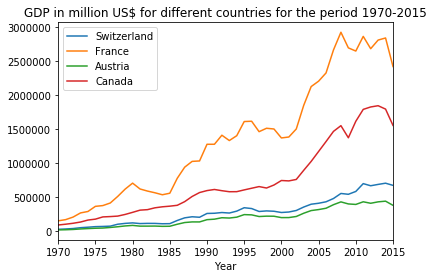

In [11]:
select_switzerland = df_useful["GDP"]['Area']=='Switzerland'
select_france = df_useful["GDP"]['Area']=='France'
select_austria = df_useful["GDP"]['Area']=='Austria'
select_canada = df_useful["GDP"]['Area']=='Canada'
ax = df_useful["GDP"][select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful["GDP"][select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful["GDP"][select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful["GDP"][select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('GDP in million US$ for different countries for the period 1970-2015')

For dissolute or new countries, we have some Nan values (before appearing or after dissolution) as in this next example :

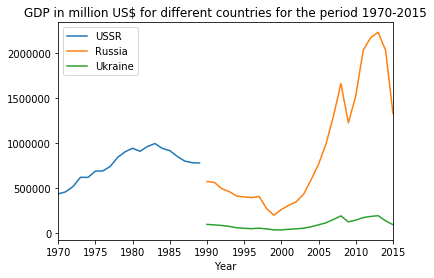

In [12]:
select_USSR = df_useful["GDP"]['Area']=='USSR'
select_russia = df_useful["GDP"]['Area']=='Russian Federation'
select_ukraine = df_useful["GDP"]['Area']=='Ukraine'
ax = df_useful["GDP"][select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful["GDP"][select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful["GDP"][select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('GDP in million US$ for different countries for the period 1970-2015')

##### 1.D.a.ii. Extracting crops harvested area, production, seed and yield from the "Crops production" dataset<a name="1Daii"></a>
We want to extract crops **harvested area**, **production**, **seed** and **yield** from the **"Crops production" dataset**. As all crops are not food crops, we request the [World crops database](https://world-crops.com/food-crops/) to **keep only the food crops**.

In [13]:
def get_food_crops():
    #Return a list of crops categorized as food crops https://world-crops.com/food-crops/
    url="https://world-crops.com/food-crops/"
    r=requests.get(url,headers={"User-Agent": "XY"})
    soup=BeautifulSoup(r.text,'html.parser')
    elements_temp=soup.find_all('a',href=re.compile("^../"))
    elements=[el.text for el in elements_temp]
    
    #only 40 elements are displayed on each page->iterating on the total list
    for i in range(40,401,40):
        url_i=url+"?ss="+str(i)
        r=requests.get(url_i,headers={"User-Agent":"XY"})
        soup=BeautifulSoup(r.text,'html.parser')
        new_elements=soup.find_all('a',href=re.compile("^../"))
        elements+=[el.text for el in new_elements]
    return elements

def inclusive_search(string,elements):
    #returns true if the string can be found in elements. The search removes special characters from string in order to include more positive results
    string=string.lower()
    delimiters = ",", "(","&",")"," and "," "
    pattern = '|'.join(map(re.escape, delimiters))
    strings=list(filter(None,re.split(pattern,string)))
    found=False
    for s in strings:
        if s=="nes":
            continue
        for el in elements:
            found=(s in el.split())
            if found==False and s[-1]=="s":
                found=s[:-1] in el.split()
            if found==False and s[-2:]=="es":
                found=s[:-2] in el.split()
            if found==False and s[-3:]=="ies":
                found=s[:-3]+"y" in el.split()
            if found==True:
                return found
    return found


def get_food_crop_data(df):    
    #extracts the food crop data, returns 4 df: Area,Production,Seed and yield    
    df=df.copy()
    food_crops=list(map(lambda x: x.lower(),get_food_crops()))              
    crop_types_df=df[['Item','Value']].groupby('Item').sum()
    crop_types_df=crop_types_df[list(map(lambda x : inclusive_search(x,food_crops) , crop_types_df.index ))]   
    food_crop_df=df[df.Item.apply(lambda x: x in crop_types_df.index)]
    return (food_crop_df[food_crop_df.Element=='Area harvested'],
            food_crop_df[food_crop_df.Element=='Production'],
            food_crop_df[food_crop_df.Element=='Seed'],
            food_crop_df[food_crop_df.Element=='Yield'])
  
food_crop_area_df , food_crop_production_df , food_crop_seed_df , food_crop_yield_df = get_food_crop_data(df["Crops production"])

In [14]:
df_useful['Crops Production'] = food_crop_production_df.drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

We check everything is fine by looking at samples for each of the new dataframes:

In [15]:
display('Crops Production', df_useful['Crops Production'].sample(5))

'Crops Production'

Area Code            Area                       Item  Year    Unit  \
678943          81           Ghana                 Sugar cane  2000  tonnes   
329458         351           China  Fruit, tropical fresh nes  1979  tonnes   
1015382        126       Lithuania                      Wheat  2010  tonnes   
2317304       5401  Eastern Europe      Roots and tubers, nes  2003  tonnes   
718845          88            Guam     Roots and Tubers,Total  2003  tonnes   

             Value  
678943    140000.0  
329458    544069.0  
1015382  1710400.0  
2317304        NaN  
718845      2120.0

We also make some plots to have a first understanding of the dataset:

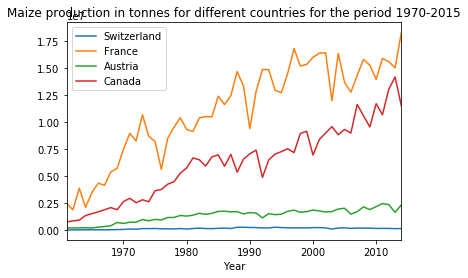

In [16]:
select_Maize = df_useful['Crops Production']['Item']=='Maize'
maize_df = df_useful['Crops Production'][select_Maize]

select_switzerland = maize_df['Area']=='Switzerland'
select_france = maize_df['Area']=='France'
select_austria = maize_df['Area']=='Austria'
select_canada = maize_df['Area']=='Canada'
ax = maize_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Maize production in tonnes for different countries for the period 1970-2015')

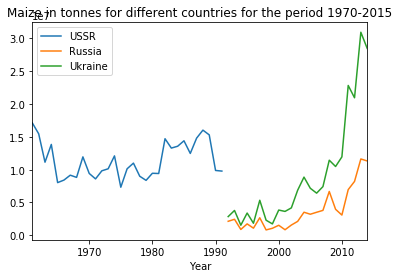

In [17]:
select_USSR = maize_df['Area']=='USSR'
select_russia = maize_df['Area']=='Russian Federation'
select_ukraine = maize_df['Area']=='Ukraine'
ax = maize_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Maize in tonnes for different countries for the period 1970-2015')

##### 1.D.a.iii. Extracting stocks production from the "Livestock production" dataset<a name="1Daiii"></a>

We want to extract **stocks production** from the **"Livestock production" dataset**. Again, we drop the columns that are useless for us and have a first look of the data with a sample and some plots.

In [18]:
selection_stocks = df['Livestock production']["Element"] == 'Stocks'
df_useful['Livestock production'] = df['Livestock production'][selection_stocks].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

In [19]:
display(df_useful['Livestock production'].sample(5))

Area Code                  Area             Item  Year       Unit  \
38781          61     Equatorial Guinea             Pigs  1969       Head   
120402        225  United Arab Emirates    Poultry Birds  1981  1000 Head   
14550          20              Botswana  Sheep and Goats  1988       Head   
111144        211           Switzerland         Beehives  1994         No   
60875         106                 Italy  Sheep and Goats  1968       Head   

            Value  
38781      4100.0  
120402     2692.0  
14550   1949700.0  
111144   269938.0  
60875   9409400.0

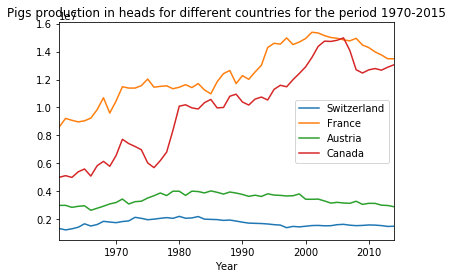

In [20]:
select_pigs = df_useful['Livestock production']['Item']=='Pigs'
pigs_df = df_useful['Livestock production'][select_pigs]

select_switzerland = pigs_df['Area']=='Switzerland'
select_france = pigs_df['Area']=='France'
select_austria = pigs_df['Area']=='Austria'
select_canada = pigs_df['Area']=='Canada'
ax = pigs_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Pigs production in heads for different countries for the period 1970-2015')

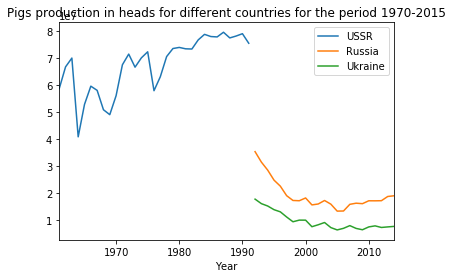

In [21]:
select_USSR = pigs_df['Area']=='USSR'
select_russia = pigs_df['Area']=='Russian Federation'
select_ukraine = pigs_df['Area']=='Ukraine'
ax = pigs_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Pigs production in heads for different countries for the period 1970-2015')

##### 1.D.a.iv. Extracting import and export quantities from the "Live animals trade" and "Crops trade" datasets<a name="1Daiv"></a>
Now, we extract **import and export quantities** from the **"Live animals trade" and "Crops trade" datasets**, having again some samples and some plots.

In [22]:
selection_import_quantities = df['Live animals trade']["Element"] == 'Import Quantity'
selection_export_quantities = df['Live animals trade']["Element"] == 'Export Quantity'

df_useful['Live animals import quantities'] = df['Live animals trade'][selection_import_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])
df_useful['Live animals export quantities'] = df['Live animals trade'][selection_export_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

In [23]:
display(df_useful['Live animals import quantities'].sample(5))

Area Code             Area             Item  Year       Unit     Value
512232        251           Zambia  Sheep and Goats  2013       Head     883.0
612052       5402  Northern Europe            Sheep  1982       Head  107600.0
126947         98          Croatia           Horses  1999       Head     121.0
167995         66             Fiji             Pigs  1985       Head       2.0
556653       5200         Americas            Ducks  1995  1000 Head    3297.0

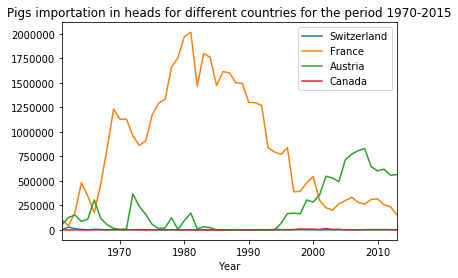

In [24]:
select_pigs = df_useful['Live animals import quantities']['Item']=='Pigs'
pigs_df = df_useful['Live animals import quantities'][select_pigs]

select_switzerland = pigs_df['Area']=='Switzerland'
select_france = pigs_df['Area']=='France'
select_austria = pigs_df['Area']=='Austria'
select_canada = pigs_df['Area']=='Canada'
ax = pigs_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Pigs importation in heads for different countries for the period 1970-2015')

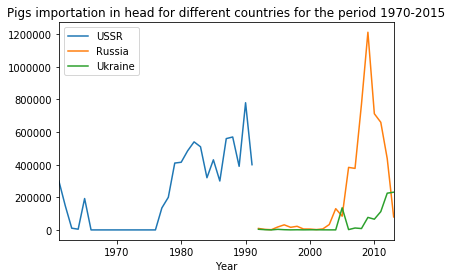

In [25]:
select_USSR = pigs_df['Area']=='USSR'
select_russia = pigs_df['Area']=='Russian Federation'
select_ukraine = pigs_df['Area']=='Ukraine'
ax = pigs_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Pigs importation in head for different countries for the period 1970-2015')

In [26]:
display(df_useful['Live animals export quantities'].sample(5))

Area Code            Area             Item  Year  Unit  Value
341353        162          Norway  Sheep and Goats  1986  Head    0.0
254724        114           Kenya  Sheep and Goats  1976  Head  436.0
460971        219           Tonga           Cattle  1962  Head    NaN
238621        106           Italy             Pigs  1962  Head    7.0
484320        229  United Kingdom            Mules  1962  Head    0.0

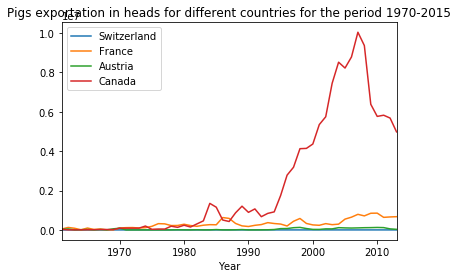

In [27]:
select_pigs = df_useful['Live animals export quantities']['Item']=='Pigs'
pigs_df = df_useful['Live animals export quantities'][select_pigs]

select_switzerland = pigs_df['Area']=='Switzerland'
select_france = pigs_df['Area']=='France'
select_austria = pigs_df['Area']=='Austria'
select_canada = pigs_df['Area']=='Canada'
ax = pigs_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Pigs exportation in heads for different countries for the period 1970-2015')

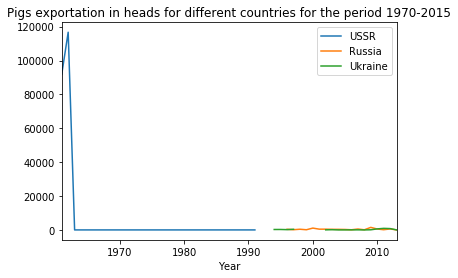

In [28]:
select_USSR = pigs_df['Area']=='USSR'
select_russia = pigs_df['Area']=='Russian Federation'
select_ukraine = pigs_df['Area']=='Ukraine'
ax = pigs_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Pigs exportation in heads for different countries for the period 1970-2015')

In [29]:
selection_import_quantities = df['Food trade']["Element"] == 'Import Quantity'
selection_export_quantities = df['Food trade']["Element"] == 'Export Quantity'

df_useful['Food import quantities'] = df['Food trade'][selection_import_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])
df_useful['Food export quantities'] = df['Food trade'][selection_export_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

In [30]:
display(df_useful['Food import quantities'].sample(5))

Area Code                               Area                   Item  \
3247681          72                           Djibouti           Poultry Meat   
13267004       5400                             Europe           Flour, maize   
4079306          75                             Gambia  Sugar Raw Centrifugal   
14100691       5706                     European Union                    Tea   
14437662       5815  Low Income Food Deficit Countries    Oil, olive residues   

          Year    Unit     Value  
3247681   1968  tonnes       0.0  
13267004  1976  tonnes  192839.0  
4079306   1962  tonnes       NaN  
14100691  1999  tonnes  316031.0  
14437662  2000  tonnes    6595.0

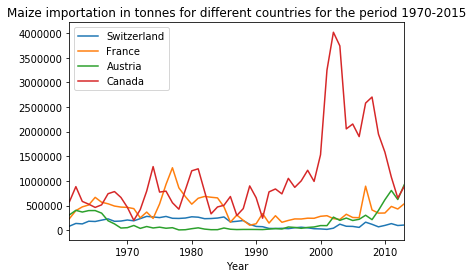

In [31]:
select_Maize = df_useful['Food import quantities']['Item']=='Maize'
maize_df = df_useful['Food import quantities'][select_Maize]

select_switzerland = maize_df['Area']=='Switzerland'
select_france = maize_df['Area']=='France'
select_austria = maize_df['Area']=='Austria'
select_canada = maize_df['Area']=='Canada'
ax = maize_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Maize importation in tonnes for different countries for the period 1970-2015')

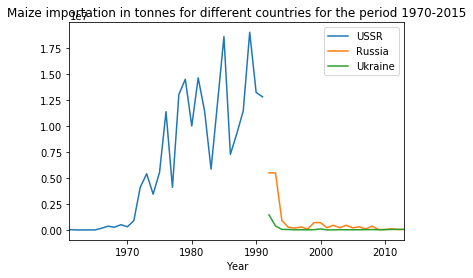

In [32]:
select_USSR = maize_df['Area']=='USSR'
select_russia = maize_df['Area']=='Russian Federation'
select_ukraine = maize_df['Area']=='Ukraine'
ax = maize_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Maize importation in tonnes for different countries for the period 1970-2015')

In [33]:
display(df_useful['Food export quantities'].sample(5))

Area Code                                     Area  \
14519266       5817  Net Food Importing Developing Countries   
2069437          40                                    Chile   
12506187       5203                         Northern America   
9755615         209                                Swaziland   
12686227       5207                            South America   

                          Item  Year    Unit     Value  
14519266             Meat, nes  1962  tonnes    6047.0  
2069437   Cocoa, powder & cake  1996  tonnes       7.0  
12506187                Onions  2005  tonnes  386139.0  
9755615               Chestnut  2004  tonnes       3.0  
12686227       Cake, sunflower  2004  tonnes  988372.0

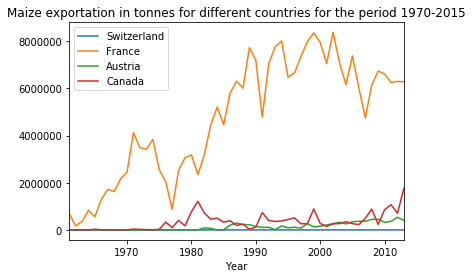

In [34]:
select_Maize = df_useful['Food export quantities']['Item']=='Maize'
maize_df = df_useful['Food export quantities'][select_Maize]

select_switzerland = maize_df['Area']=='Switzerland'
select_france = maize_df['Area']=='France'
select_austria = maize_df['Area']=='Austria'
select_canada = maize_df['Area']=='Canada'
ax = maize_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Maize exportation in tonnes for different countries for the period 1970-2015')

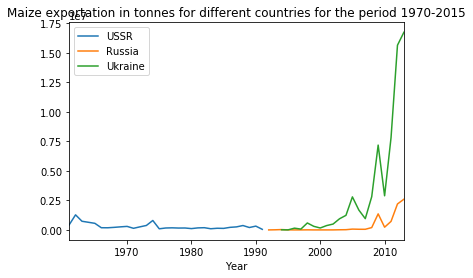

In [35]:
select_USSR = maize_df['Area']=='USSR'
select_russia = maize_df['Area']=='Russian Federation'
select_ukraine = maize_df['Area']=='Ukraine'
ax = maize_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Maize exportation in tonnes for different countries for the period 1970-2015')

##### 1.D.a.v. Extracting average CPI of each year from the "Consumer price indices" dataset<a name="1Dav"></a>

The **"Consumer price indices" dataset** contains **monthly data**. In order to have a **uniform dataframe**, and as other dataframes have **yearly data**, we will group it by (Country, Year) and compute the monthly mean for every year. Then we add a column to show the relative change in CPI, as this is what measures inflation, according to the following formula:

$$\frac{CPI_t - CPI_{t-1}}{CPI_{t-1}}$$

In [36]:
df_useful['Consumer price indices'] =  df['Consumer price indices'][['Area','Year','Value']] \
                                        .dropna() \
                                        .groupby(['Area',"Year"]) \
                                        .mean() \
                                        .reset_index() \
                                        .dropna()

In [37]:

#We calculate the relative change in CPI for each year relative to last years CPI - this indicates yearly inflation. The first year in each area is set to 0.


df_useful['Consumer price indices']['Value'] = np.where(df_useful['Consumer price indices']['Area'] == df_useful['Consumer price indices']['Area'].shift(1),
         ((df_useful['Consumer price indices']['Value'] - df_useful['Consumer price indices']['Value'].shift(1))/df_useful['Consumer price indices']['Value'].shift(1)) * 100, 0)




In [38]:
display(df_useful['Consumer price indices'].head(5))

Area  Year      Value
0  Afghanistan  2004   0.000000
1  Afghanistan  2005  11.606340
2  Afghanistan  2006   7.254896
3  Afghanistan  2007   8.482889
4  Afghanistan  2008  30.554940

With samples and plots, we remark that this dataset **only starts in 2000** wheareas other ones start in 1970.

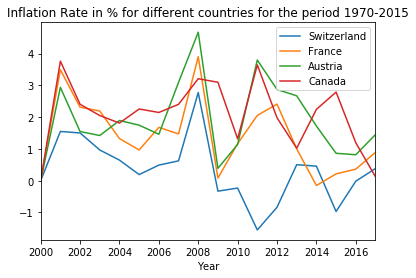

In [39]:
select_switzerland = df_useful['Consumer price indices']['Area']=='Switzerland'
select_france = df_useful['Consumer price indices']['Area']=='France'
select_austria = df_useful['Consumer price indices']['Area']=='Austria'
select_canada = df_useful['Consumer price indices']['Area']=='Canada'
ax = df_useful['Consumer price indices'][select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful['Consumer price indices'][select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful['Consumer price indices'][select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful['Consumer price indices'][select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Inflation Rate in % for different countries for the period 1970-2015')

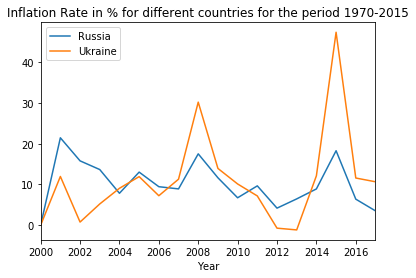

In [40]:
select_russia = df_useful["Consumer price indices"]['Area']=='Russian Federation'
select_ukraine = df_useful["Consumer price indices"]['Area']=='Ukraine'
ax = df_useful["Consumer price indices"][select_russia].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful["Consumer price indices"][select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(['Russia', 'Ukraine'])
_ = ax.set_title('Inflation Rate in % for different countries for the period 1970-2015')

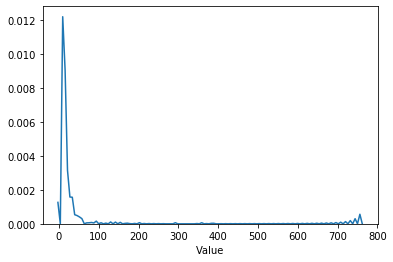

In [41]:
_ = sns.distplot(abs(df_useful["Consumer price indices"]["Value"]), rug=False, hist=False)

In [42]:
#looking at the cases where food prices increased over 100% during one year
df_useful["Consumer price indices"].loc[df_useful["Consumer price indices"]["Value"] > 100]

Area  Year       Value
55                                Angola  2001  152.561015
56                                Angola  2002  108.897433
851     Democratic Republic of the Congo  2001  359.936605
1280                              Guinea  2010  292.596028
2636               Sao Tome and Principe  2014  759.321212
2801                     Solomon Islands  2012  203.559117
2833                         South Sudan  2016  386.378414
2834                         South Sudan  2017  130.056890
3283  Venezuela (Bolivarian Republic of)  2015  171.224360
3284  Venezuela (Bolivarian Republic of)  2016  142.586732

It seems that the formula calculating food price inflation is actually correct. These are realistic cases where the price increased by over 100% in the span of a year. 

##### 1.D.a.vi. Removing areas which are not countries <a name="1Davi"></a>

Having a more detailled look at the dataset, we have remarked that the **areas which are real countries** are exactely the ones with an "Area Code" below $5000$ but not in $[261, 269]$.

In [43]:
#remove Area code >= 5000 or in [261, 269] (EU)
for df_name in df_useful :
    if 'Area Code' in df_useful[df_name].keys() : 
        print ("Removing areas which are not countries in", df_name)
        selection_countries = df_useful[df_name]['Area Code']<261 
        selection_countries = selection_countries | (df_useful[df_name]['Area Code']>269)
        selection_countries = selection_countries & (df_useful[df_name]['Area Code']<5000)
        df_useful[df_name] = df_useful[df_name][selection_countries]
        display(df_useful[df_name].sample(5))
    else :
        print (df_name, "is already clean")

Removing areas which are not countries in GDP


Area Code               Area  Year         Value
172067         68             France  1992  1.408660e+06
104004         41    China, mainland  1993  6.230538e+05
156551         61  Equatorial Guinea  1977  4.014032e+01
317980        144         Mozambique  2002  5.031520e+03
219823        101          Indonesia  1983  9.986605e+04

Removing areas which are not countries in Crops Production


Area Code                  Area                       Item  Year  \
701966          86               Grenada           Fruit, fresh nes  2010   
1504327        200             Singapore     Roots and Tubers,Total  1966   
1626120        212  Syrian Arab Republic                    Oranges  1962   
1077447        135            Martinique  Chillies and peppers, dry  2001   
272241          32              Cameroon            Oil, palm fruit  1967   

           Unit     Value  
701966   tonnes    2649.0  
1504327  tonnes    7899.0  
1626120  tonnes    2800.0  
1077447  tonnes     286.0  
272241   tonnes  694000.0

Removing areas which are not countries in Livestock production


Area Code                       Area           Item  Year       Unit  \
26700         214  China, Taiwan Province of          Sheep  1991       Head   
5816           10                  Australia  Poultry Birds  1964  1000 Head   
127761        249                      Yemen          Sheep  1980       Head   
25278          41            China, mainland       Beehives  1993         No   
92193         173                     Poland          Sheep  1984       Head   

            Value  
26700       397.0  
5816      21475.0  
127761  2953000.0  
25278   7012000.0  
92193   4533642.0

Removing areas which are not countries in Live animals import quantities


Area Code               Area       Item  Year       Unit  Value
165687         64      Faroe Islands   Beehives  2009         No    0.0
44564          23             Belize      Ducks  2011  1000 Head    0.0
120587         48         Costa Rica   Beehives  1974         No    NaN
219686        100              India      Mules  2001       Head    NaN
65341          26  Brunei Darussalam  Buffaloes  2007       Head   20.0

Removing areas which are not countries in Live animals export quantities


Area Code                        Area             Item  Year  \
235144        105                      Israel          Turkeys  1983   
496663        228                        USSR           Horses  1973   
226257        102  Iran (Islamic Republic of)            Mules  2000   
305386        143                     Morocco             Pigs  1990   
321198        150                 Netherlands  Bovine, Animals  2008   

             Unit     Value  
235144  1000 Head       0.0  
496663       Head   32957.0  
226257       Head       NaN  
305386       Head       0.0  
321198       Head  134988.0

Removing areas which are not countries in Food import quantities


Area Code               Area                             Item  Year  \
7028116        149              Nepal                        Beet pulp  1963   
3805036         67            Finland   Juice, citrus, single strength  1967   
5578317        112             Jordan  Juice, grapefruit, concentrated  1985   
8452454        117  Republic of Korea         Skins, calve, wet salted  2003   
9209389        200          Singapore                             Jute  2005   

           Unit  Value  
7028116  tonnes    NaN  
3805036  tonnes    0.0  
5578317  tonnes    NaN  
8452454  tonnes    0.0  
9209389  tonnes    2.0

Removing areas which are not countries in Food export quantities


Area Code                              Area  \
8569822         183                           Romania   
8989571         194                      Saudi Arabia   
1211689          19  Bolivia (Plurinational State of)   
10811178        229                    United Kingdom   
6146658         129                        Madagascar   

                                 Item  Year    Unit   Value  
8569822                    Sugar, nes  2012  tonnes   181.0  
8989571              Meat Sheep Fresh  1988  tonnes  3716.0  
1211689   Flour, roots and tubers nes  2011  tonnes     2.0  
10811178              Whey, condensed  2012  tonnes  2392.0  
6146658                         Bread  1984  tonnes   377.0

Consumer price indices is already clean


#### 1.D.b. Handling of the missing data  <a name="1Db"></a>

In this section, we will explain how we will handle the missing data in previous dataframes for maps.

##### 1.D.b.i. Highlighting the problem  <a name="1Dbi"></a> 

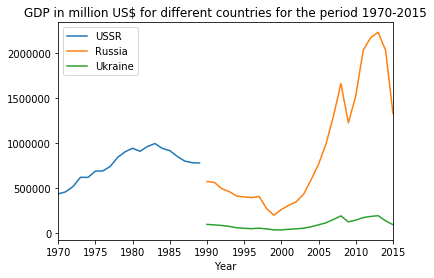

In [44]:
select_USSR = df_useful["GDP"]['Area']=='USSR'
select_russia = df_useful["GDP"]['Area']=='Russian Federation'
select_ukraine = df_useful["GDP"]['Area']=='Ukraine'
ax = df_useful["GDP"][select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful["GDP"][select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful["GDP"][select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('GDP in million US$ for different countries for the period 1970-2015')

In order to **vizualize folium maps**, we need to **associate each country a value**. The geojson file that we use is not timestamped and **only countries that exist nowadays** are inside it. As **some countries has been dissolved** during the past 50 years, our folium maps won't be complete. For instance, we do not have any value for Ukraine from 1970 to 1989. Our idea to fix this issue is presented in the next paragraph.

##### 1.D.b.ii. Proposed correction  <a name="1Dbii"></a> 


Our idea is to **map the former country value to each of the current ones**. For instance in 1982, USSR GDP is around one trillion \\$. Therefore, if we associate (**only for folium map purposes**) this value to each current country that succeeded USSR, **all these countries will appear the same color** in the folium map, i.e. all the USSR area will appear the same color (and the good one).

In order to do so, one need to **identify which countries appeared and disappeared** from the dataset and **at which year**. Then we will use this result along with some **historical research** in our `visualise_world_data_folium` function ([1.E.a.](#1Ea)).

In [45]:
countries_formation_years = {}
for country in df_useful["GDP"]["Area"].unique():
    selection = df_useful["GDP"]["Area"] == country
    year_in, year_out = df_useful["GDP"][selection].dropna()["Year"].min(), df_useful["GDP"][selection].dropna()["Year"].max()
    for year in (year_in, year_out):
        if year not in countries_formation_years :
            countries_formation_years[year] = []
    countries_formation_years[year_in].append((country,'+'))
    countries_formation_years[year_out].append((country,'-'))

countries_formation_years.pop(1970)
countries_formation_years.pop(2015)
for year in sorted(list(countries_formation_years)):
    print (year, countries_formation_years[year])

1988 [('Yemen Ar Rp', '-'), ('Yemen Dem', '-')]
1989 [('Czechoslovakia', '-'), ('Ethiopia PDR', '-'), ('USSR', '-'), ('Yemen', '+'), ('Yugoslav SFR', '-')]
1990 [('Armenia', '+'), ('Azerbaijan', '+'), ('Belarus', '+'), ('Bosnia and Herzegovina', '+'), ('Croatia', '+'), ('Czechia', '+'), ('Eritrea', '+'), ('Estonia', '+'), ('Ethiopia', '+'), ('Georgia', '+'), ('Kazakhstan', '+'), ('Kyrgyzstan', '+'), ('Latvia', '+'), ('Lithuania', '+'), ('Montenegro', '+'), ('Republic of Moldova', '+'), ('Russian Federation', '+'), ('Serbia', '+'), ('Slovakia', '+'), ('Slovenia', '+'), ('Tajikistan', '+'), ('The former Yugoslav Republic of Macedonia', '+'), ('Timor-Leste', '+'), ('Turkmenistan', '+'), ('Ukraine', '+'), ('Uzbekistan', '+')]
1999 [('Kosovo', '+')]
2005 [('Curaçao', '+'), ('Sint Maarten (Dutch Part)', '+')]
2007 [('Sudan (former)', '-')]
2008 [('South Sudan', '+'), ('Sudan', '+')]
2012 [('Netherlands Antilles (former)', '-')]


### 1.E. Preprocessing the data set  <a name="1E"></a>

In this part, we will finish prepocessing the datasets. More precisely, we will deal with **country names** and **normalizing** the features.

1.  
    5. 
    
        1. [Converting country names between different naming conventions](#1Ea)
        
        2. [Normalization and log scales](#1Eb)

#### 1.E.a. Converting country names between different naming conventions  <a name="1Ea"></a>
Some countries have **different names in the geojson file and in the dataset**. We first start by correcting them.

In [46]:
# Useful method for name correction
def correct_country_names(old_name, dic):
    if old_name in dic.keys() :
        return dic[old_name]
    return old_name

In [47]:
# Declaring dictionary with name correction
dic = {'Czechia': "Czech Republic",
       'Russian Federation':'Russia',
       "Serbia":"Republic of Serbia",
       'The former Yugoslav Republic of Macedonia':'Macedonia',
       'China, mainland':'China',
       'Viet Nam':'Vietnam',
       'Venezuela (Bolivarian Republic of)':'Venezuela',
       'Iran (Islamic Republic of)':'Iran',
       'Syrian Arab Republic':"Syria",
       'Bolivia (Plurinational State of)': 'Bolivia',
       "Côte d'Ivoire": "Ivory Coast",
       'Congo':"Republic of the Congo",
       "Lao People's Democratic Republic":'Laos',
       "Democratic People's Republic of Korea":"North Korea",
       'Republic of Korea':"South Korea",
       'USSR':['Armenia',
               'Azerbaijan',
               'Belarus',
               'Estonia',
               'Georgia',
               'Kazakhstan',
               'Kyrgyzstan',
               'Latvia',
               'Lithuania',
               'Montenegro',
               'Republic of Moldova',
               'Russia',
               'Republic of Serbia',
               'Timor-Leste',
               'Turkmenistan',
               'Ukraine',
               'Uzbekistan'],
       'Ethiopia PDR':['Eritrea','Ethiopia'],
       'Yugoslav SFR':['Kosovo', 'Slovenia', 'Croatia','Macedonia', 'Bosnia and Herzegovina'],
       'Yemen Dem':['Yemen'],
       'Czechoslovakia':["Czech Republic", 'Slovakia'],
       'Netherlands Antilles (former)':['Curaçao', 'Sint Maarten (Dutch Part)'],
       'Sudan (former)':['South Sudan', 'Sudan']}

# Correcting each DataFrame
for df_name in df_useful :
    print (df_name)
    df_useful[df_name]["Area"] = df_useful[df_name]["Area"].apply(lambda x : correct_country_names(x,dic))
    df_useful[df_name]=df_useful[df_name].explode('Area')

GDP
Crops Production
Livestock production
Live animals import quantities
Live animals export quantities
Food import quantities
Food export quantities
Consumer price indices


Then, we do a function that takes as input **a dataframe and a year** and produces the **corresponding folium map**. This function also h**andles dissolutions of countries** as suggested [before](#1Dbii).

In [48]:
import matplotlib.colors as colors

def visualise_world_data_folium(df, to_visualise, year, log=True):
    
    # Defining color palette
    color_scale = sns.cubehelix_palette(9)
    
    # importing geojson and transforming to pandas
    geo_data=json.load(open("Scripts/Data/world-countries.json"))
    dics=geo_data['features']
    clean_dics=[]
    for country in dics:
        clean_dics.append({'Country':country['properties']['name'],
                          'geometry':country['geometry']})
    geo_df=pd.DataFrame(clean_dics)
    
    # cropping to df to data of interest
    df_visu=df[df.Year==year][['Area',to_visualise]]

    # Merging with geo data
    df_visu=geo_df.merge(df_visu,how='left',left_on='Country',right_on='Area')
    df_visu=df_visu.dropna()
    
    if log:
        df_visu[to_visualise]=df_visu[to_visualise].apply(lambda x : np.log10(x))
    
    # creating bins for color scaling
    ma_value=df_visu[to_visualise].max()
    mi_value=df_visu[to_visualise].min()
    bins=np.linspace(mi_value,ma_value,8)
    
    # creating Json string for folium
    features=[]
    for _,row in df_visu.iterrows():
        color=np.digitize(row[to_visualise],bins)
        if (log):
            val=np.power(10,row[to_visualise])
        else:
            val=row[to_visualise]
        feature={
            'type' : 'Feature',
            
            'properties':{'name':row['Country'],
                          'value': '{:.2E}'.format(val),
                          'color':colors.to_hex(color_scale[color])},
            'geometry':row['geometry']
            }
        features.append(feature)
    
    def style(feature):
        
        if feature['properties']['value']==np.nan:
            print("lol")
            opac=0
        else:
            opac=0.8
        return {'fillOpacity':opac,
                   'weight':0.1,
                   'fillColor':feature['properties']['color']}
    geo_data=folium.GeoJson({'type':'FeatureCollection','features':features},style_function=style,tooltip=folium.features.GeoJsonTooltip(['name','value']))
    m=folium.Map()
    geo_data.add_to(m)
    return m

We can know use it to produce some maps. For instance, we plot below the map of GDP for the year 1985 (before dissolution of USSR) and 1995 (after).

In [49]:
display(visualise_world_data_folium(df_useful["GDP"], 'Value', 1985, True))
display(visualise_world_data_folium(df_useful["GDP"], 'Value', 1995, True))

#### 1.E.b. Normalization and log scales  <a name="1Eb"></a>

Some of our features **seem to be right skewed**. At first glance it seems that they look like power laws.

For instance the distribution of GDP look a bit like a power law:

//anaconda3/envs/ada/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
//anaconda3/envs/ada/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


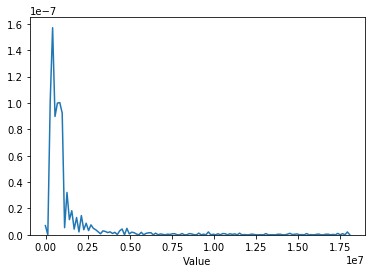

In [50]:
_ = sns.distplot(df_useful["GDP"]["Value"], rug=False, hist=False)

As we later want to train some Machine Learning models, we log those values so that their distribution look a bit **more like a normal distribution**.

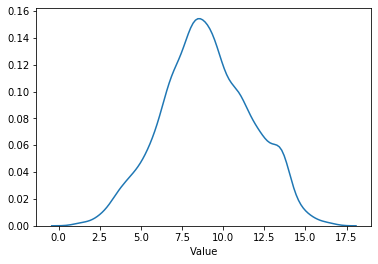

In [51]:
#looks better with log scale
_ = sns.distplot(np.log(df_useful["GDP"]["Value"]), rug=False, hist=False)

The new distribution indeed looks better to train models on it.

### 1.F. Making one uniformized dataframe  <a name="1F"></a>

In this part, we will make one **uniformized dataframe** `uni_df` with the following columns.


    Country | Year | GDP | Crops production columns | Livestock production columns | Crops importation columns | Livestock importation columns | Crops exportation columns | Livestock exportation columns | CPI
    
In this uniformized dataframe, **a tuple `(Country, Year)` uniquely identifies a row**.


#### 1.F.a. Pivoting dataframes with items  <a name="1Fa"></a>

The current dataframes have several rows for a given `(Country, Year)`. Each of this row correspond to one item. We would like to have a unique row for a given `(Country, Year)` and one column per item:

In [52]:
need_pivot = ['Crops Production',
              'Livestock production',
              'Live animals import quantities',
              'Live animals export quantities',
              'Food import quantities',
              'Food export quantities']

def rename_columns(x, word):
    if x not in ['Area', 'Year', 'ha', 'tonnes', 'hg/ha', 'Head', '1000 Head']:
        return x + ' ' + word
    return x

df_useful['GDP'] = df_useful['GDP'].rename(columns = {'Value':'(GDP, million $)'})[["Area",'Year','(GDP, million $)']]
df_useful['Consumer price indices'] = df_useful['Consumer price indices'].rename(columns = {'Value':'(Consumer price indices, %)'})[["Area",'Year','(Consumer price indices, %)']]

for df_name in need_pivot :
    df_useful[df_name] = pd.pivot_table(df_useful[df_name], index=["Area",'Year'], columns=["Item","Unit"], values="Value").rename(columns=lambda x: rename_columns(x, df_name))
    display(df_name, df_useful[df_name].sample(5))

'Crops Production'

Item                           Anise, badian, fennel, coriander Crops Production  \
Unit                                                                      tonnes   
Area                      Year                                                     
Wallis and Futuna Islands 1976                                               NaN   
Tajikistan                2007                                               NaN   
Saudi Arabia              1976                                               NaN   
Laos                      1968                                               NaN   
Iraq                      1979                                               NaN   

Item                           Apples Crops Production  \
Unit                                            tonnes   
Area                      Year                           
Wallis and Futuna Islands 1976                     NaN   
Tajikistan                2007                111000.0   
Saudi Arabia              1976                     NaN   
Laos                      1968                     NaN   
Iraq                      1979                101000.0   

Item                           Apricots Crops Production  \
Unit                                              tonnes   
Area                      Year                             
Wallis and Futuna Islands 1976                       NaN   
Tajikistan                2007                   15500.0   
Saudi Arabia              1976                       NaN   
Laos                      1968                       NaN   
Iraq                      1979                   31800.0   

Item                           Areca nuts Crops Production  \
Unit                                                tonnes   
Area                      Year                               
Wallis and Futuna Islands 1976                         NaN   
Tajikistan                2007                         NaN   
Saudi Arabia              1976                         NaN   
Laos                      1968                         NaN   
Iraq                      1979                         NaN   

Item                           Artichokes Crops Production  \
Unit                                                tonnes   
Area                      Year                               
Wallis and Futuna Islands 1976                         NaN   
Tajikistan                2007                         NaN   
Saudi Arabia              1976                         NaN   
Laos                      1968                         NaN   
Iraq                      1979                         NaN   

Item                           Asparagus Crops Production  \
Unit                                               tonnes   
Area                      Year                              
Wallis and Futuna Islands 1976                        NaN   
Tajikistan                2007                        NaN   
Saudi Arabia              1976                        NaN   
Laos                      1968                        NaN   
Iraq                      1979                        NaN   

Item                           Avocados Crops Production  \
Unit                                              tonnes   
Area                      Year                             
Wallis and Futuna Islands 1976                       NaN   
Tajikistan                2007                       NaN   
Saudi Arabia              1976                       NaN   
Laos                      1968                       NaN   
Iraq                      1979                       NaN   

Item                           Bambara beans Crops Production  \
Unit                                                   tonnes   
Area                      Year                                  
Wallis and Futuna Islands 1976                            NaN   
Tajikistan                2007                            NaN   
Saudi Arabia              1976                            NaN   
Laos                      1

'Livestock production'

Item                        Animals live nes Livestock production  \
Unit                                                         Head   
Area                   Year                                         
Gambia                 1983                                   NaN   
British Virgin Islands 1974                                   NaN   
Uzbekistan             1996                                   NaN   
Panama                 2007                                   NaN   
Denmark                1986                                   NaN   

Item                        Asses Livestock production  \
Unit                                              Head   
Area                   Year                              
Gambia                 1983                    34000.0   
British Virgin Islands 1974                      410.0   
Uzbekistan             1996                   175000.0   
Panama                 2007                        NaN   
Denmark                1986                        NaN   

Item                        Beehives Livestock production  \
Unit                              No Livestock production   
Area                   Year                                 
Gambia                 1983                           NaN   
British Virgin Islands 1974                           NaN   
Uzbekistan             1996                      138000.0   
Panama                 2007                           NaN   
Denmark                1986                           NaN   

Item                        Buffaloes Livestock production  \
Unit                                                  Head   
Area                   Year                                  
Gambia                 1983                            NaN   
British Virgin Islands 1974                            NaN   
Uzbekistan             1996                            NaN   
Panama                 2007                            NaN   
Denmark                1986                            NaN   

Item                        Camelids, other Livestock production  \
Unit                                                        Head   
Area                   Year                                        
Gambia                 1983                                  NaN   
British Virgin Islands 1974                                  NaN   
Uzbekistan             1996                                  NaN   
Panama                 2007                                  NaN   
Denmark                1986                                  NaN   

Item                        Camels Livestock production  \
Unit                                               Head   
Area                   Year                               
Gambia                 1983                         NaN   
British Virgin Islands 1974                         NaN   
Uzbekistan             1996                     25000.0   
Panama                 2007                         NaN   
Denmark                1986                         NaN   

Item                        Cattle Livestock production  \
Unit                                               Head   
Area                   Year                               
Gambia                 1983                    295000.0   
British Virgin Islands 1974                      2200.0   
Uzbekistan             1996                   5204000.0   
Panama                 2007                   1526200.0   
Denmark                1986                   2495000.0   

Item                        Cattle and Buffaloes Livestock production  \
Unit                                                             Head   
Area                   Year                                             
Gambia                 1983                                  295000.0   
British Virgin Islands 1974                                    2200.0   
Uzbekistan             1996                                 5204000.0   
Panama                 2007                                 1526200

'Live animals import quantities'

Item           Animals live nes Live animals import quantities  \
Unit                                                      Head   
Area      Year                                                   
Belarus   1982                                             NaN   
Ethiopia  1970                                             0.0   
Belarus   1995                                             NaN   
Nicaragua 1973                                             NaN   
Malaysia  1990                                             NaN   

Item           Asses Live animals import quantities  \
Unit                                           Head   
Area      Year                                        
Belarus   1982                                  NaN   
Ethiopia  1970                                  NaN   
Belarus   1995                                  NaN   
Nicaragua 1973                                  NaN   
Malaysia  1990                                  0.0   

Item           Beehives Live animals import quantities  \
Unit                 No Live animals import quantities   
Area      Year                                           
Belarus   1982                                     NaN   
Ethiopia  1970                                     NaN   
Belarus   1995                                     NaN   
Nicaragua 1973                                     NaN   
Malaysia  1990                                     NaN   

Item           Bovine, Animals Live animals import quantities  \
Unit                                                     Head   
Area      Year                                                  
Belarus   1982                                       151000.0   
Ethiopia  1970                                            0.0   
Belarus   1995                                            NaN   
Nicaragua 1973                                         1482.0   
Malaysia  1990                                        24117.0   

Item           Buffaloes Live animals import quantities  \
Unit                                               Head   
Area      Year                                            
Belarus   1982                                      NaN   
Ethiopia  1970                                      NaN   
Belarus   1995                                      NaN   
Nicaragua 1973                                      NaN   
Malaysia  1990                                    312.0   

Item           Camelids, other Live animals import quantities  \
Unit                                                     Head   
Area      Year                                                  
Belarus   1982                                            NaN   
Ethiopia  1970                                            NaN   
Belarus   1995                                            NaN   
Nicaragua 1973                                            NaN   
Malaysia  1990                                            NaN   

Item           Camels Live animals import quantities  \
Unit                                            Head   
Area      Year                                         
Belarus   1982                                   NaN   
Ethiopia  1970                                   NaN   
Belarus   1995                                   NaN   
Nicaragua 1973                                   NaN   
Malaysia  1990                                   NaN   

Item           Cattle Live animals import quantities  \
Unit                                            Head   
Area      Year                                         
Belarus   1982                              151000.0   
Ethiopia  1970                                   0.0   
Belarus   1995                                   NaN   
Nicaragua 1973                                1482.0   
Malaysia  1990                               23805.0   

Item           Chickens Live animals import quantities  \
Unit                                         1000 Head   
Area      Year                      

'Live animals export quantities'

Item           Animals live nes Live animals export quantities  \
Unit                                                      Head   
Area      Year                                                   
Georgia   1963                                             NaN   
Greece    2001                                             NaN   
Venezuela 1967                                             NaN   
Bulgaria  1981                                             NaN   
China     2007                                             0.0   

Item           Asses Live animals export quantities  \
Unit                                           Head   
Area      Year                                        
Georgia   1963                                  NaN   
Greece    2001                                  5.0   
Venezuela 1967                                  NaN   
Bulgaria  1981                                  0.0   
China     2007                                  0.0   

Item           Beehives Live animals export quantities  \
Unit                 No Live animals export quantities   
Area      Year                                           
Georgia   1963                                     NaN   
Greece    2001                                     NaN   
Venezuela 1967                                     NaN   
Bulgaria  1981                                     NaN   
China     2007                                     NaN   

Item           Bovine, Animals Live animals export quantities  \
Unit                                                     Head   
Area      Year                                                  
Georgia   1963                                            NaN   
Greece    2001                                            0.0   
Venezuela 1967                                            0.0   
Bulgaria  1981                                         8211.0   
China     2007                                        50888.0   

Item           Buffaloes Live animals export quantities  \
Unit                                               Head   
Area      Year                                            
Georgia   1963                                      NaN   
Greece    2001                                      NaN   
Venezuela 1967                                      NaN   
Bulgaria  1981                                    193.0   
China     2007                                      0.0   

Item           Camelids, other Live animals export quantities  \
Unit                                                     Head   
Area      Year                                                  
Georgia   1963                                            NaN   
Greece    2001                                            NaN   
Venezuela 1967                                            NaN   
Bulgaria  1981                                            NaN   
China     2007                                            NaN   

Item           Camels Live animals export quantities  \
Unit                                            Head   
Area      Year                                         
Georgia   1963                                   NaN   
Greece    2001                                   NaN   
Venezuela 1967                                   NaN   
Bulgaria  1981                                   NaN   
China     2007                                   NaN   

Item           Cattle Live animals export quantities  \
Unit                                            Head   
Area      Year                                         
Georgia   1963                                   NaN   
Greece    2001                                   0.0   
Venezuela 1967                                   0.0   
Bulgaria  1981                                8018.0   
China     2007                               50888.0   

Item           Chickens Live animals export quantities  \
Unit                                         1000 Head   
Area      Year                      

'Food import quantities'

Item                  Alfalfa meal and pellets Food import quantities  \
Unit                                                           tonnes   
Area             Year                                                   
Namibia          2012                                          1919.0   
Senegal          1988                                             NaN   
Curaçao          1972                                             NaN   
French Polynesia 2013                                            93.0   
Zambia           2001                                             NaN   

Item                  Almonds shelled Food import quantities  \
Unit                                                  tonnes   
Area             Year                                          
Namibia          2012                                   24.0   
Senegal          1988                                    6.0   
Curaçao          1972                                    NaN   
French Polynesia 2013                                   27.0   
Zambia           2001                                    NaN   

Item                  Animal Oil+Fat+Grs Food import quantities  \
Unit                                                     tonnes   
Area             Year                                             
Namibia          2012                                     244.0   
Senegal          1988                                   10631.0   
Curaçao          1972                                       NaN   
French Polynesia 2013                                      41.0   
Zambia           2001                                    3259.0   

Item                  Animal Vegetable Oil Food import quantities  \
Unit                                                       tonnes   
Area             Year                                               
Namibia          2012                                     19472.0   
Senegal          1988                                     31080.0   
Curaçao          1972                                      2282.0   
French Polynesia 2013                                      3760.0   
Zambia           2001                                     37190.0   

Item                  Animal fats Food import quantities  \
Unit                                              tonnes   
Area             Year                                      
Namibia          2012                              244.0   
Senegal          1988                            10631.0   
Curaçao          1972                                NaN   
French Polynesia 2013                               41.0   
Zambia           2001                             3259.0   

Item                  Anise, badian, fennel, coriander Food import quantities  \
Unit                                                                   tonnes   
Area             Year                                                           
Namibia          2012                                               14.0        
Senegal          1988                                                1.0        
Curaçao          1972                                                NaN        
French Polynesia 2013                                                2.0        
Zambia           2001                                              108.0        

Item                  Apples Food import quantities  \
Unit                                         tonnes   
Area             Year                                 
Namibia          2012                        7350.0   
Senegal          1988                        2613.0   
Curaçao          1972                         938.0   
French Polynesia 2013                        1114.0   
Zambia           2001                        3774.0   

Item                  Apricots Food import quantities  \
Unit                                           tonnes   
Area             Year                                   
Namibia          2012                            61.0   
Senegal      

'Food export quantities'

Item                     Alfalfa meal and pellets Food export quantities  \
Unit                                                              tonnes   
Area                Year                                                   
Russia              2004                                             NaN   
Uzbekistan          1984                                             NaN   
Singapore           2006                                            65.0   
Antigua and Barbuda 1970                                             NaN   
Equatorial Guinea   1966                                             NaN   

Item                     Almonds shelled Food export quantities  \
Unit                                                     tonnes   
Area                Year                                          
Russia              2004                                   16.0   
Uzbekistan          1984                                    0.0   
Singapore           2006                                  365.0   
Antigua and Barbuda 1970                                    NaN   
Equatorial Guinea   1966                                    NaN   

Item                     Animal Oil+Fat+Grs Food export quantities  \
Unit                                                        tonnes   
Area                Year                                             
Russia              2004                                     101.0   
Uzbekistan          1984                                    3600.0   
Singapore           2006                                    1437.0   
Antigua and Barbuda 1970                                       NaN   
Equatorial Guinea   1966                                       NaN   

Item                     Animal Vegetable Oil Food export quantities  \
Unit                                                          tonnes   
Area                Year                                               
Russia              2004                                    161072.0   
Uzbekistan          1984                                    105019.0   
Singapore           2006                                    372976.0   
Antigua and Barbuda 1970                                         NaN   
Equatorial Guinea   1966                                      3000.0   

Item                     Animal fats Food export quantities  \
Unit                                                 tonnes   
Area                Year                                      
Russia              2004                              101.0   
Uzbekistan          1984                             3600.0   
Singapore           2006                             1437.0   
Antigua and Barbuda 1970                                NaN   
Equatorial Guinea   1966                                NaN   

Item                     Anise, badian, fennel, coriander Food export quantities  \
Unit                                                                      tonnes   
Area                Year                                                           
Russia              2004                                              972.0        
Uzbekistan          1984                                                NaN        
Singapore           2006                                             6989.0        
Antigua and Barbuda 1970                                                NaN        
Equatorial Guinea   1966                                                NaN        

Item                     Apples Food export quantities  \
Unit                                            tonnes   
Area                Year                                 
Russia              2004                        2296.0   
Uzbekistan          1984                           NaN   
Singapore           2006                        7948.0   
Antigua and Barbuda 1970                           NaN   
Equatorial Guinea   1966                           NaN   

Item                     Apricots Food export quantities  \
Unit         

Some **Nan values** have appeared. After some analysis, we have conclude to replace those Nan values by zeros. Indeed, it seems that those Nan values means that the value were very low and not significant to be measured.

In [53]:
# Deal with the NaN that appeared
for df_name in df_useful :
    if df_name != "GDP":
        for column in list(df_useful[df_name]):
            if column not in ['Area', 'Year']:
                df_useful[df_name][column].fillna(0, inplace=True)

In [54]:
#removing the multiindex, so that merge is clean with GDP and CPI
for df_name in need_pivot :
    df_useful[df_name].columns = [' '.join([str(_) for _ in v]) for v in df_useful[df_name].columns.values]
    display(df_useful[df_name].sample(5))
    

Anise, badian, fennel, coriander Crops Production tonnes  \
Area        Year                                                             
South Korea 1991                                                0.0          
Bolivia     1990                                                0.0          
Namibia     2005                                                0.0          
Panama      1965                                                0.0          
Japan       1985                                                0.0          

                  Apples Crops Production tonnes  \
Area        Year                                   
South Korea 1991                        542015.0   
Bolivia     1990                          7970.0   
Namibia     2005                             0.0   
Panama      1965                             0.0   
Japan       1985                        910300.0   

                  Apricots Crops Production tonnes  \
Area        Year                                     
South Korea 1991                               0.0   
Bolivia     1990                               0.0   
Namibia     2005                               0.0   
Panama      1965                               0.0   
Japan       1985                               0.0   

                  Areca nuts Crops Production tonnes  \
Area        Year                                       
South Korea 1991                                 0.0   
Bolivia     1990                                 0.0   
Namibia     2005                                 0.0   
Panama      1965                                 0.0   
Japan       1985                                 0.0   

                  Artichokes Crops Production tonnes  \
Area        Year                                       
South Korea 1991                                 0.0   
Bolivia     1990                                 0.0   
Namibia     2005                                 0.0   
Panama      1965                                 0.0   
Japan       1985                                 0.0   

                  Asparagus Crops Production tonnes  \
Area        Year                                      
South Korea 1991                                0.0   
Bolivia     1990                                0.0   
Namibia     2005                                0.0   
Panama      1965                                0.0   
Japan       1985                            29000.0   

                  Avocados Crops Production tonnes  \
Area        Year                                     
South Korea 1991                               0.0   
Bolivia     1990                            5410.0   
Namibia     2005                               0.0   
Panama      1965                            5800.0   
Japan       1985                               0.0   

                  Bambara beans Crops Production tonnes  \
Area        Year                                          
South Korea 1991                                    0.0   
Bolivia     1990                                    0.0   
Namibia     2005                                    0.0   
Panama      1965                                    0.0   
Japan       1985                                    0.0   

                  Bananas Crops Production tonnes  \
Area        Year                                    
South Korea 1991                              0.0   
Bolivia     1990                         138000.0   
Namibia     2005                              0.0   
Panama      1965                         578900.0   
Japan       1985                            995.0   

                  Barley Crops Production tonnes  ...  \
Area        Year                                  ...   
South Korea 1991                        471625.0  ...   
Bolivia     1990                         65064.0  ...   
Namibia     2005                             0.0  ...   
Panama      1965                             0.0  ...   
Japan       1985                        377600.0

Animals live nes Livestock production Head  \
Area                 Year                                               
Algeria              1984                                         0.0   
Ecuador              1980                                         0.0   
United Arab Emirates 1970                                         0.0   
Gambia               1992                                         0.0   
Nepal                1989                                         0.0   

                           Asses Livestock production Head  \
Area                 Year                                    
Algeria              1984                         403350.0   
Ecuador              1980                         206667.0   
United Arab Emirates 1970                              0.0   
Gambia               1992                          31494.0   
Nepal                1989                              0.0   

                           Beehives Livestock production No Livestock production  \
Area                 Year                                                          
Algeria              1984                                           198000.0       
Ecuador              1980                                            62000.0       
United Arab Emirates 1970                                                0.0       
Gambia               1992                                                0.0       
Nepal                1989                                                0.0       

                           Buffaloes Livestock production Head  \
Area                 Year                                        
Algeria              1984                                  0.0   
Ecuador              1980                                  0.0   
United Arab Emirates 1970                                  0.0   
Gambia               1992                                  0.0   
Nepal                1989                            3002803.0   

                           Camelids, other Livestock production Head  \
Area                 Year                                              
Algeria              1984                                        0.0   
Ecuador              1980                                        0.0   
United Arab Emirates 1970                                        0.0   
Gambia               1992                                        0.0   
Nepal                1989                                        0.0   

                           Camels Livestock production Head  \
Area                 Year                                     
Algeria              1984                          125350.0   
Ecuador              1980                               0.0   
United Arab Emirates 1970                          100000.0   
Gambia               1992                               0.0   
Nepal                1989                               0.0   

                           Cattle Livestock production Head  \
Area                 Year                                     
Algeria              1984                         1403900.0   
Ecuador              1980                         3005390.0   
United Arab Emirates 1970                           15000.0   
Gambia               1992                          342986.0   
Nepal                1989                         6284918.0   

                           Cattle and Buffaloes Livestock production Head  \
Area                 Year                                                   
Algeria              1984                                       1403900.0   
Ecuador              1980                                       3005390.0   
United Arab Emirates 1970                                         15000.0   
Gambia               1992                                        342986.0   
Nepal                1989                                       9287721.0   

                           Chickens Livestock production 1000 Head  \
Area                 Year    

Animals live nes Live animals import quantities Head  \
Area        Year                                                         
Haiti       1971                                                0.0      
South Korea 1989                                                0.0      
Panama      2009                                                0.0      
Iceland     2009                                                0.0      
Comoros     1967                                                0.0      

                  Asses Live animals import quantities Head  \
Area        Year                                              
Haiti       1971                                        0.0   
South Korea 1989                                       14.0   
Panama      2009                                        0.0   
Iceland     2009                                        0.0   
Comoros     1967                                        0.0   

                  Beehives Live animals import quantities No Live animals import quantities  \
Area        Year                                                                              
Haiti       1971                                                0.0                           
South Korea 1989                                                0.0                           
Panama      2009                                                2.0                           
Iceland     2009                                                0.0                           
Comoros     1967                                                0.0                           

                  Bovine, Animals Live animals import quantities Head  \
Area        Year                                                        
Haiti       1971                                                0.0     
South Korea 1989                                               11.0     
Panama      2009                                              418.0     
Iceland     2009                                                0.0     
Comoros     1967                                             2050.0     

                  Buffaloes Live animals import quantities Head  \
Area        Year                                                  
Haiti       1971                                            0.0   
South Korea 1989                                            0.0   
Panama      2009                                            0.0   
Iceland     2009                                            0.0   
Comoros     1967                                            0.0   

                  Camelids, other Live animals import quantities Head  \
Area        Year                                                        
Haiti       1971                                                0.0     
South Korea 1989                                                0.0     
Panama      2009                                                0.0     
Iceland     2009                                                0.0     
Comoros     1967                                                0.0     

                  Camels Live animals import quantities Head  \
Area        Year                                               
Haiti       1971                                         0.0   
South Korea 1989                                         0.0   
Panama      2009                                         0.0   
Iceland     2009                                         0.0   
Comoros     1967                                         0.0   

                  Cattle Live animals import quantities Head  \
Area        Year                                               
Haiti       1971                                         0.0   
South Korea 1989                                        11.0   
Panama      2009                                       418.0   
Iceland     2009                                         0.0   
Comoros     1967                                      2050.0   


Animals live nes Live animals export quantities Head  \
Area                  Year                                                         
Kyrgyzstan            2005                                                0.0      
United Kingdom        1974                                                0.0      
Republic of the Congo 2001                                                0.0      
Malawi                1994                                                0.0      
Seychelles            1986                                                0.0      

                            Asses Live animals export quantities Head  \
Area                  Year                                              
Kyrgyzstan            2005                                        0.0   
United Kingdom        1974                                       71.0   
Republic of the Congo 2001                                        0.0   
Malawi                1994                                        0.0   
Seychelles            1986                                        0.0   

                            Beehives Live animals export quantities No Live animals export quantities  \
Area                  Year                                                                              
Kyrgyzstan            2005                                                0.0                           
United Kingdom        1974                                                0.0                           
Republic of the Congo 2001                                                0.0                           
Malawi                1994                                                0.0                           
Seychelles            1986                                                0.0                           

                            Bovine, Animals Live animals export quantities Head  \
Area                  Year                                                        
Kyrgyzstan            2005                                             4859.0     
United Kingdom        1974                                            87077.0     
Republic of the Congo 2001                                                0.0     
Malawi                1994                                                0.0     
Seychelles            1986                                                0.0     

                            Buffaloes Live animals export quantities Head  \
Area                  Year                                                  
Kyrgyzstan            2005                                            0.0   
United Kingdom        1974                                            0.0   
Republic of the Congo 2001                                            0.0   
Malawi                1994                                            0.0   
Seychelles            1986                                            0.0   

                            Camelids, other Live animals export quantities Head  \
Area                  Year                                                        
Kyrgyzstan            2005                                                0.0     
United Kingdom        1974                                                0.0     
Republic of the Congo 2001                                                0.0     
Malawi                1994                                                0.0     
Seychelles            1986                                                0.0     

                            Camels Live animals export quantities Head  \
Area                  Year                                               
Kyrgyzstan            2005                                         0.0   
United Kingdom        1974                                         0.0   
Republic of the Congo 2001                                         0.0   
Malawi                1994                                         0.0   
Seychelles            1986                 

Alfalfa meal and pellets Food import quantities tonnes  \
Area             Year                                                           
Ecuador          1971                                                0.0        
Vietnam          1978                                                0.0        
Armenia          1964                                                0.0        
Papua New Guinea 2006                                                0.0        
Nigeria          2010                                                0.0        

                       Almonds shelled Food import quantities tonnes  \
Area             Year                                                  
Ecuador          1971                                            0.0   
Vietnam          1978                                            0.0   
Armenia          1964                                         1800.0   
Papua New Guinea 2006                                            0.0   
Nigeria          2010                                            0.0   

                       Animal Oil+Fat+Grs Food import quantities tonnes  \
Area             Year                                                     
Ecuador          1971                                           17218.0   
Vietnam          1978                                               0.0   
Armenia          1964                                               0.0   
Papua New Guinea 2006                                            2093.0   
Nigeria          2010                                          101602.0   

                       Animal Vegetable Oil Food import quantities tonnes  \
Area             Year                                                       
Ecuador          1971                                            37083.0    
Vietnam          1978                                             1000.0    
Armenia          1964                                            64849.0    
Papua New Guinea 2006                                             8008.0    
Nigeria          2010                                           935248.0    

                       Animal fats Food import quantities tonnes  \
Area             Year                                              
Ecuador          1971                                    17218.0   
Vietnam          1978                                        0.0   
Armenia          1964                                        0.0   
Papua New Guinea 2006                                     2093.0   
Nigeria          2010                                   101602.0   

                       Anise, badian, fennel, coriander Food import quantities tonnes  \
Area             Year                                                                   
Ecuador          1971                                              320.0                
Vietnam          1978                                                0.0                
Armenia          1964                                                0.0                
Papua New Guinea 2006                                                0.0                
Nigeria          2010                                               63.0                

                       Apples Food import quantities tonnes  \
Area             Year                                         
Ecuador          1971                                 269.0   
Vietnam          1978                                   0.0   
Armenia          1964                              158600.0   
Papua New Guinea 2006                                 866.0   
Nigeria          2010                                 522.0   

                       Apricots Food import quantities tonnes  \
Area             Year                                           
Ecuador          1971                                     0.0   
Vietnam          1978                                     0.0   
Armenia          1964                                     0.0   
Papua New Guinea

Alfalfa meal and pellets Food export quantities tonnes  \
Area               Year                                                           
New Caledonia      1972                                                0.0        
Republic of Serbia 2013                                                0.0        
North Korea        1977                                                0.0        
Indonesia          2003                                               32.0        
Colombia           1991                                                0.0        

                         Almonds shelled Food export quantities tonnes  \
Area               Year                                                  
New Caledonia      1972                                            0.0   
Republic of Serbia 2013                                           42.0   
North Korea        1977                                            0.0   
Indonesia          2003                                           72.0   
Colombia           1991                                            0.0   

                         Animal Oil+Fat+Grs Food export quantities tonnes  \
Area               Year                                                     
New Caledonia      1972                                               0.0   
Republic of Serbia 2013                                             785.0   
North Korea        1977                                               0.0   
Indonesia          2003                                             454.0   
Colombia           1991                                               0.0   

                         Animal Vegetable Oil Food export quantities tonnes  \
Area               Year                                                       
New Caledonia      1972                                                0.0    
Republic of Serbia 2013                                           161739.0    
North Korea        1977                                                0.0    
Indonesia          2003                                          7783996.0    
Colombia           1991                                             2751.0    

                         Animal fats Food export quantities tonnes  \
Area               Year                                              
New Caledonia      1972                                        0.0   
Republic of Serbia 2013                                      785.0   
North Korea        1977                                        0.0   
Indonesia          2003                                      454.0   
Colombia           1991                                        0.0   

                         Anise, badian, fennel, coriander Food export quantities tonnes  \
Area               Year                                                                   
New Caledonia      1972                                                0.0                
Republic of Serbia 2013                                              524.0                
North Korea        1977                                                0.0                
Indonesia          2003                                              178.0                
Colombia           1991                                                2.0                

                         Apples Food export quantities tonnes  \
Area               Year                                         
New Caledonia      1972                                   0.0   
Republic of Serbia 2013                              115938.0   
North Korea        1977                                7000.0   
Indonesia          2003                                  55.0   
Colombia           1991                                  11.0   

                         Apricots Food export quantities tonnes  \
Area               Year                                           
New Caledonia      1972                                     0.0   
Republic of Serbia 2013                     

#### 1.F.b. Dealing with unit discrepencies  <a name="1Fb"></a>
Before merging dataframes, we notice two different units in the dataframes dealing with livestock datas: "1000 Heads" and "Heads". Let's have a look at the following dataframes:
* Livestock production
* Live animals import quantities
* Live animals export quantities


In [55]:
#Select dfs that correspond to livestock data
livestock_dfs={s:df_useful[s] for s in df_useful.keys() if 'live' in s.lower()}

Before handling the data, we want to know if the columns presented in "1000 Heads" are also presented in "Heads"

In [56]:
# Useful method to remove words from string
def drop_words( s , w=1 , end=True):
    if end:
        return s.rsplit(' ',w)[0]
    else:
        return s.split(' ',w)[-1]
    

for key in livestock_dfs.keys():
    col=livestock_dfs[key].columns
    th_heads=[s for s in col if '1000 head' in s.lower()]
    heads=[s for s in col if '1000 head' not in s.lower()]
    shared=[s for s in th_heads if drop_words(s,2)+" Head" in heads]
    print('There are {} columns expressed in "1000 Heads" and {} columns expressed in "Head" in the dataframe {} and {} columns are expressed in both'
          .format(len(th_heads),len(heads),key,len(shared)))
    

There are 8 columns expressed in "1000 Heads" and 14 columns expressed in "Head" in the dataframe Livestock production and 0 columns are expressed in both
There are 6 columns expressed in "1000 Heads" and 14 columns expressed in "Head" in the dataframe Live animals import quantities and 0 columns are expressed in both
There are 6 columns expressed in "1000 Heads" and 14 columns expressed in "Head" in the dataframe Live animals export quantities and 0 columns are expressed in both


In [57]:
def convert_1000H_to_head(df):
    
    # methods converting the columns expressed in "1000 Head" in "Head" and renaming them
    
    cols_to_convert=[col for col in df.columns if '1000 head' in col.lower()]
    df[cols_to_convert]=df[cols_to_convert]*1000
    new_cols=[drop_words(s,2)+' Head' for s in cols_to_convert]
    name_dic={old:new for old,new in zip(cols_to_convert,new_cols)}
    df=df.rename(columns=name_dic)
    return df

In [58]:
for key in livestock_dfs.keys():
    df_useful[key]=convert_1000H_to_head(df_useful[key])
    display(df_useful[key].head(1))

Animals live nes Livestock production Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Asses Livestock production Head  \
Area        Year                                    
Afghanistan 1961                        1300000.0   

                  Beehives Livestock production No Livestock production  \
Area        Year                                                          
Afghanistan 1961                                                0.0       

                  Buffaloes Livestock production Head  \
Area        Year                                        
Afghanistan 1961                                  0.0   

                  Camelids, other Livestock production Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Camels Livestock production Head  \
Area        Year                                     
Afghanistan 1961                          250000.0   

                  Cattle Livestock production Head  \
Area        Year                                     
Afghanistan 1961                         2900000.0   

                  Cattle and Buffaloes Livestock production Head  \
Area        Year                                                   
Afghanistan 1961                                       2900000.0   

                  Chickens Livestock production Head  \
Area        Year                                       
Afghanistan 1961                           4700000.0   

                  Ducks Livestock production Head  ...  \
Area        Year                                   ...   
Afghanistan 1961                              0.0  ...   

                  Horses Livestock production Head  \
Area        Year                                     
Afghanistan 1961                          276841.0   

                  Mules Livestock production Head  \
Area        Year                                    
Afghanistan 1961                          20000.0   

                  Pigeons, other birds Livestock production Head  \
Area        Year                                                   
Afghanistan 1961                                             0.0   

                  Pigs Livestock production Head  \
Area        Year                                   
Afghanistan 1961                             0.0   

                  Poultry Birds Livestock production Head  \
Area        Year                                            
Afghanistan 1961                                4700000.0   

                  Rabbits and hares Livestock production Head  \
Area        Year                                                
Afghanistan 1961                                          0.0   

                  Rodents, other Livestock production Head  \
Area        Year                                             
Afghanistan 1961                                       0.0   

                  Sheep Livestock production Head  \
Area        Year                                    
Afghanistan 1961                       18000000.0   

                  Sheep and Goats Livestock production Head  \
Area        Year                                              
Afghanistan 1961                                 22200000.0   

                  Turkeys Livestock production Head  
Area        Year                                     
Afghanistan 1961                                0.0  

[1 rows x 22 columns]

Animals live nes Live animals import quantities Head  \
Area        Year                                                         
Afghanistan 1961                                                0.0      

                  Asses Live animals import quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Beehives Live animals import quantities No Live animals import quantities  \
Area        Year                                                                              
Afghanistan 1961                                                0.0                           

                  Bovine, Animals Live animals import quantities Head  \
Area        Year                                                        
Afghanistan 1961                                                0.0     

                  Buffaloes Live animals import quantities Head  \
Area        Year                                                  
Afghanistan 1961                                            0.0   

                  Camelids, other Live animals import quantities Head  \
Area        Year                                                        
Afghanistan 1961                                                0.0     

                  Camels Live animals import quantities Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Cattle Live animals import quantities Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Chickens Live animals import quantities Head  \
Area        Year                                                 
Afghanistan 1961                                           0.0   

                  Ducks Live animals import quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Goats Live animals import quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Horses Live animals import quantities Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Mules Live animals import quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Pigeons, other birds Live animals import quantities Head  \
Area        Year                                                             
Afghanistan 1961                                                0.0          

                  Pigs Live animals import quantities Head  \
Area        Year                                             
Afghanistan 1961                                       0.0   

                  Rabbits and hares Live animals import quantities Head  \
Area        Year                                                          
Afghanistan 1961                                                0.0       

                  Rodents, other Live animals import quantities Head  \
Area        Year                                                       
Afghanistan 1961                                                0.0    

                  Sheep Live animals import quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Sheep and Goats Live animals import quantities Head  \
Area        Year                                                        
Afghanistan 1961                                                0.0     

                  Turkeys Live animals import quantiti

Animals live nes Live animals export quantities Head  \
Area        Year                                                         
Afghanistan 1961                                                0.0      

                  Asses Live animals export quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Beehives Live animals export quantities No Live animals export quantities  \
Area        Year                                                                              
Afghanistan 1961                                                0.0                           

                  Bovine, Animals Live animals export quantities Head  \
Area        Year                                                        
Afghanistan 1961                                                0.0     

                  Buffaloes Live animals export quantities Head  \
Area        Year                                                  
Afghanistan 1961                                            0.0   

                  Camelids, other Live animals export quantities Head  \
Area        Year                                                        
Afghanistan 1961                                                0.0     

                  Camels Live animals export quantities Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Cattle Live animals export quantities Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Chickens Live animals export quantities Head  \
Area        Year                                                 
Afghanistan 1961                                           0.0   

                  Ducks Live animals export quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Goats Live animals export quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Horses Live animals export quantities Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Mules Live animals export quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Pigeons, other birds Live animals export quantities Head  \
Area        Year                                                             
Afghanistan 1961                                                0.0          

                  Pigs Live animals export quantities Head  \
Area        Year                                             
Afghanistan 1961                                       0.0   

                  Rabbits and hares Live animals export quantities Head  \
Area        Year                                                          
Afghanistan 1961                                                0.0       

                  Rodents, other Live animals export quantities Head  \
Area        Year                                                       
Afghanistan 1961                                                0.0    

                  Sheep Live animals export quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Sheep and Goats Live animals export quantities Head  \
Area        Year                                                        
Afghanistan 1961                                                0.0     

                  Turkeys Live animals export quantiti

#### 1.F.c. Merging everything  <a name="1Fc"></a>
We are now creating the uniformized dataframe `uni_df`. Each row corresponds to one tuple `(Country, Year)` so that we can later **group by country** or **year**. In addition to the country ("Area") and the "Year", the columns will either be an **economic feature ("GDP", "CPI")** or an **agricultural one (some crop harvested area, some livestock export quantity, ...)**. With this uniformized dataframe, we can later on **analyze correlations and links** between different feautures place and yearwise. This means we can measure a correlation of e.g. GDP with the production of a specific crop over all countries and all years.

In [59]:
uni_df = df_useful['GDP'].dropna()
for df_name in need_pivot :
    uni_df = pd.merge(uni_df, df_useful[df_name], how='left', on=['Area', 'Year'])
uni_df = pd.merge(uni_df,df_useful['Consumer price indices'], how='left', on=['Area', 'Year'])

# Deal with the NaN that appeared
for column in list(uni_df):
    if column not in ['Area', 'Year']:
        uni_df[column].fillna(0, inplace=True)
uni_df.sample(30)

Area  Year  (GDP, million $)  \
2186              Croatia  1997      23822.146366   
6375             Pakistan  1979      25797.571983   
8071            Swaziland  2005       3106.889814   
153               Andorra  1985        438.742504   
4319               Jordan  2012      30937.277556   
1583       Cayman Islands  1977        101.541710   
5322               Mexico  1974      89574.999125   
9148           Azerbaijan  1979     901615.848300   
1987              Comoros  2008       1071.748080   
2575             Dominica  1976         38.717424   
8703               Uganda  1981       3687.893276   
6174                Niger  2008       5403.362220   
6480               Panama  1992       7595.514095   
8466  Trinidad and Tobago  2000       8154.390168   
6680          Philippines  2008     174195.184950   
1306         Burkina Faso  1976        852.962171   
1015              Bolivia  1987       4314.429472   
7788         South Africa  1998     139913.010850   
5056             Maldives  1984        149.350886   
7418              Senegal  2004       8031.344240   
1083             Botswana  1983        926.393354   
2990                 Fiji  1997       2123.555203   
9590              Croatia  1975      33279.200501   
765               Belarus  2013      73097.615695   
9036            Lithuania  1972     515797.471200   
6419                Palau  1977         19.236065   
1976              Comoros  1997        438.958837   
5088                 Mali  1970        350.024669   
555            Azerbaijan  2013      74160.553009   
9043              Ukraine  1972     515797.471200   

      Anise, badian, fennel, coriander Crops Production tonnes  \
2186                                                0.0          
6375                                                0.0          
8071                                                0.0          
153                                                 0.0          
4319                                                0.0          
1583                                                0.0          
5322                                              340.0          
9148                                                0.0          
1987                                                0.0          
2575                                                0.0          
8703                                                0.0          
6174                                                0.0          
6480                                                0.0          
8466                                                0.0          
6680                                                0.0          
1306                                                0.0          
1015                                                0.0          
7788                                                0.0          
5056                                                0.0          
7418                                                0.0          
1083                                                0.0          
2990                                                0.0          
9590                                             1500.0          
765                                                 0.0          
9036                                                0.0          
6419                                                0.0          
1976                                                0.0          
5088                                                0.0          
555                                                 0.0          
9043                                                0.0          

      Apples Crops Production tonnes  Apricots Crops Production tonnes  \
2186                         57541.0                             833.0   
6375                         99282.0                           34100.0   
8071                             0.0                               0.0   
153                              0

#### 1.G The last filter  <a name="1G"></a>

At the very beginning, when importing data for the crops production, we focused on the "food crops". It is very likely that the import and export dataframes contain more data than we have in the production dataframe. As we want, later, compare these data, we decide to keep only the crops and animals for which we have production,import and export data.  

Let's have a look!

In [60]:
import_cols=[col for col in uni_df.columns if 'import' in col.lower()]
export_cols=[col for col in uni_df.columns if 'export' in col.lower()]
prod_cols=[col for col in uni_df.columns if 'production' in col.lower()]
others=[col for col in uni_df.columns if 'production' not in col.lower() and 'export' not in col.lower() and 'import' not in col.lower()]
print('There are {} import columns, {} export columns,{} production columns and {} other.'.format(len(import_cols),len(export_cols),len(prod_cols),len(others)))

There are 472 import columns, 464 export columns,144 production columns and 4 other.


There is indeed much work to be done!

In [61]:
import_col_dic={drop_words(s,3):s for s in import_cols}
export_col_dic={drop_words(s,3):s for s in export_cols}
prod_col_dic={drop_words(s,3):s for s in prod_cols}

import_keys=list(import_col_dic.keys())
export_keys=list(export_col_dic.keys())
prod_keys=list(prod_col_dic.keys())

prod=set([])
imp=set([])
exp=set([])

for prod_feature in prod_keys:
    for imp_feature in import_keys:
        if prod_feature.lower()+" food" == imp_feature.lower() or prod_feature.lower()+" live animals" == imp_feature.lower():
            for exp_feature in export_keys:
                if prod_feature.lower()+" food" == exp_feature.lower() or prod_feature.lower()+" live animals" == exp_feature.lower():
                    prod.add(prod_feature)
                    imp.add(imp_feature)
                    exp.add(exp_feature)
prod=list(prod)
prod.sort()
exp=list(exp)
exp.sort()
imp=list(imp)
imp.sort()

print('We find {} columns present in import, export and production'.format(len(prod)))

import_cols=[import_col_dic[k] for k in imp]
export_cols=[export_col_dic[k] for k in exp]
prod_cols=[prod_col_dic[k] for k in prod]

cols_of_interest=others+import_cols+export_cols+prod_cols

We find 107 columns present in import, export and production


In [62]:
uni_df=uni_df[cols_of_interest]

In [63]:
import pickle
pickle.dump(uni_df,open("Scripts/Data/uni_df.pkl",'wb'))

### 2. Data exploration and first observations  <a name="2"></a>

2. 
        
    1. [Food productions, importations and exportations](#2A)
            
    2. [Consumer price indices](#2B)      
                
    3. [Structure of international trade and historical context](#2C)       
        
    4. [Economic classification of countries](#2D)  
        
In this part, we will explore the dataset with more details. We will first see in more detail the [food productions, importations and exportations](#2A), next examine the [Consumer price indices](#2B), then study the [structure of international trade and historical context](#2C) and finally look at the [economic classification of countries](#2D).

#### 2.A. Food productions, importations and exportations <a name="2A"></a>

2. 
        
    1. 
    
        1. [Crops and livestock production and trade](#2Aa)  
    
        2. [Introducing the concept of food self-sufficiency](#2Ab)
    
            1. [Basic idea](#2Abi)
    
            2. [Formula and computation](#2Abii)

##### 2.A.a Crops and livestock production and trade <a name="2Aa"></a>
For the next milestone, we will also produce some maps, showing for instance the production of a specific crop per country over the years. We have shown in previous parts that the dataset contains the necessary data and that we can handle the data in its size and plot maps.

##### 2.A.b Introducing the concept of food self-sufficiency <a name="2Ab"></a>
In this section we will present and compute the **notion of food self-sufficiency**. We will use the **quantitative definition of the Food and Agriculture Organization (FAO)**. 
###### 2.A.b.i Basic idea <a name="2Abi"></a>
One may wonder how to know **whether a country produces all the food it needs or not**. The notion of food-self-sufficency allows to answer to this question. More formally, it is a rate that decribes how **to which degree a country can satisfy to meet its internal consumption needs by production**. It describes the extent to which a country is able to **feed its population through its domestic food production**. We are interested in this measure since we think**it could be correlated** with the economic conditions of this country, particularly **price stability**. Price stability is defined in the next part.
###### 2.A.b.ii Formula and computation <a name="2Abii"></a>
In order to compute the food self-sufficiency, we will apply the following **formula** that gives us the **food self-sudfficiency as a percentage** :

$$\frac{Production \times 100}{Production + Imports – Exports}$$

The following is a trial calculation of self-sufficiency. Refining which agriculutral products should go into this calculation still need to be done for next milestone. Indeed with our first calculations it seems that the self-sufficiency is always lower than 100% whereas this should not be the case.

In [81]:
def compute_self_suficiency(df,weights=None):
    
    # From the unified dataframe df, compute the self sufficiency score for each year for each country
    # if a paramter of weights is given as a dict, the method returns the aggregated score.
    
    
    #Useful method to manipulate names
    def drop_words( s , w=1 , end=True):
        if end:
            return s.rsplit(' ',w)[0]
        else:
            return s.split(' ',w)[-1]
    
    df=df.set_index(['Area','Year'])
    
    #Getting the columns corresponding to import, export and production
    import_cols=[col for col in df.columns if 'import' in col.lower()]
    export_cols=[col for col in df.columns if 'export' in col.lower()]
    prod_cols=[col for col in df.columns if 'production' in col.lower()]
    
    #Initializing new dataframe
    scores=pd.DataFrame(index=df.index)
    #Dict with columns names
    columns={}
    
    #Generating scores
    for i,col in enumerate(import_cols):
        key=col+prod_cols[i]+export_cols[i]
        scores[key]=(df[prod_cols[i]]*100/(
                                    df[prod_cols[i]]+df[import_cols[i]]-df[export_cols[i]]))
        columns[key]=drop_words(col,3)
        
    #If no weights, return scores without aggregate
    if weights==None:
        scores=scores.rename(columns=columns)
        return scores
    
    features=[w for w in weights.keys()]
    temp=pd.DataFrame(index=df.index)
    
    #replacing na with 0 to avoid na aggregated scores
    scores=scores.fillna(0)
    
    #Selecting features of interest
    for feat in features:
        temp=temp.merge(scores.filter(regex=feat),left_index=True,right_index=True)
    temp.columns=features
    
    #Aggregating the scores
    temp['Agg']=0
    for feat in features:
        temp['Agg']=temp['Agg']+weights[feat]*temp[feat]
    scores=temp['Agg']
    
    return scores

#### 2.B. Consumer price indices  <a name="2B"></a>

2. 
        
    2. 
    
        1. [Definition](#2Ba) 
    
        2. [Usage](#2Bb)      
        
##### 2.B.a. Definition  <a name="2Ba"></a>

**Consumer price indices (CPI)** are a way to measure the **changes of the average price level of goods**.
Typically a "basket of consumer goods and services" is used to calculate average consumer prices each year. Then, the relative change of these prices is used as a **measure of inflation or deflation over a period of time**. More technically, for a given item, the CPI is the ratio of the market basket for two different years. Global CPI is an average of sigle item CPI with **some standardized weights**. 
The FAO dataset includes the consumer prices, food indices. This means we have **information about countries food price stability over the years**.

##### 2.B.b. Usage  <a name="2Bb"></a>

The CPI has **many uses** and is often taken into consideration. For instance it is used for budget and pension revisions, monetary and economic policies, and economic analysis. It is a good indicator of relative price stability, which is essential for development and economic safety. The european central banks main objective is price stability in the euro-zone of keeping the consumer price index below a growth of 2% per year.  

**We will use the CPI** to answer the following questions: "Are prices more stables in more self-sufficient countries ?", "Is there a link between the CPI and other agricultural features ?" 

#### 2.C. Structure of international trade and historical context  <a name="2C"></a>


Our dataset contains data for the historical period **from 1970 to 2015**. In order to be able to correctly interpret the results we are going to see, we first made **a brief historical research** on this period. Listed below are important events of this period for which we think they have had a **significant influence on the agriculture and the economy**.

There was the Cold war from 1945 to 1990 with two economic superpowers (USA and USSR). The USSR had been dissolved in 1991.  The Japanese economic miracle occured from 1945 to 1990 and allowed Japan to come out of the disastrous state in which it was at the exit of the WW2 and become one of the worlds largest economies. There have been 2 big oil crises, in 1973 and 1979. There have been many wars (Middle East wars 1973-2000 e.g. Yom Kippur War 1973, Islamic Revolution in Iran 1979, Iran–Iraq war 1980-1988, Gulf war 1990-1991, Yugoslav wars 1991-2001...). We have **already seen some consequences of such events** by dealing with countries names in a previous section.

The **third Agricultural Revolution** (also known as Green revolution) occurs form 1960 to 1990 and improved agricultural productions thanks to fertilizers and chemicals.

The following public-domain image from [Wikimedia](https://commons.wikimedia.org/wiki/File:Imf-advanced-un-least-developed-2008.svg) represents developed countries (blue), developing ones (orange) and least developed ones (red) according to the United Nations and International Monetary Fund. We expect to see **similar results with our dataset (GDP)**.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Imf-advanced-un-least-developed-2008.svg/1920px-Imf-advanced-un-least-developed-2008.svg.png">

The following image, also from [Wikimedia](https://commons.wikimedia.org/wiki/File:Cumulative_Current_Account_Balance.png) shows the **cumulative commercial balance** for the period 1980-2008. We also expect to see similar results with our dataset, but **there might be difference as we focus on agriculture**.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/Cumulative_Current_Account_Balance.png/800px-Cumulative_Current_Account_Balance.png">


In order to have an idea of the **international trade and economy structure**, we are interested in **GDP**: 

In [66]:
pivoted_GDP_df = uni_df[['Area','Year']]
pivoted_GDP_df["GDP"] = uni_df["(GDP, million $)"]
pivoted_GDP_df = pivoted_GDP_df.pivot_table(index='Year', columns='Area', values="GDP").dropna(axis=1)

//anaconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [67]:
pivoted_GDP_df.sample(5)

Area   Afghanistan       Albania        Algeria      Andorra         Angola  \
Year                                                                          
1975   2366.666613   2610.110369   15555.547083   278.514317    4147.433195   
1995   3236.300000   2392.764887   41971.488420  1491.495988    6642.229474   
2015  20270.058983  11541.047833  164779.413210  2811.617372  117955.235780   
2002   4285.170218   4355.865889   56819.210891  1733.195719   15285.592487   
1991   3340.100005   1597.072192   46565.003199  1400.576915   16182.941825   

Area    Anguilla  Antigua and Barbuda     Argentina        Armenia  \
Year                                                                 
1975    7.371447            85.416591   51740.60800  685971.572350   
1995  103.736474           577.280727  279701.42537    1372.097033   
2015  319.748148          1355.645898  632343.38328   10529.182353   
2002  157.444444           809.754485  110583.59032    2534.163311   
1991   77.720091           481.706342  205589.52132    2104.061784   

Area        Aruba  ...  United Republic of Tanzania  United States of America  \
Year               ...                                                          
1975   229.003311  ...                  4893.628913                 1688900.0   
1995  1320.670391  ...                  7760.794768                 7664060.0   
2015  2701.675978  ...                 46787.407998                18036648.0   
2002  1941.094724  ...                 14140.007894                10977514.0   
1991   872.138731  ...                  7911.679877                 6174000.0   

Area       Uruguay     Uzbekistan     Vanuatu      Venezuela        Vietnam  \
Year                                                                          
1975   3824.532836  685971.572350   80.304269   32124.872326    3896.483090   
1995  21312.174665   13474.307807  272.633331   74888.970833   20736.258012   
2015  53442.380446   69004.097805  736.530342  344331.393720  193241.122950   
2002  13606.503907    9876.841087  264.219504   92889.443990   35064.105501   
1991  11095.737334   15157.816895  204.237673   51726.320757    7642.396514   

Area         Yemen        Zambia      Zimbabwe  
Year                                            
1975    140.384325   2658.265319   4692.164246  
1995   5935.683132   3806.998070   9576.473659  
2015  29687.584374  21255.231421  13893.026130  
2002  12247.088236   4193.839169   7111.380000  
1991   4183.404717   3376.806697  10952.089847  

[5 rows x 209 columns]

As we can see on a subset of the correlation matrix below, GDP are often hugely correlated between countries. 

In [68]:
selected_countries = ['Algeria', 'Australia', 'Austria', 'Bangladesh', 'China',
                      'Djibouti', 'France', 'Germany', 'India', 'Japan', 'Mali',
                      'Switzerland', 'United States of America']

corr = pivoted_GDP_df[selected_countries].corr()
corr.style.background_gradient(cmap='coolwarm')

The correlation matrix contains lots of values that are very closed to one (red). This is also true for the whole correlation matrix as seen below:

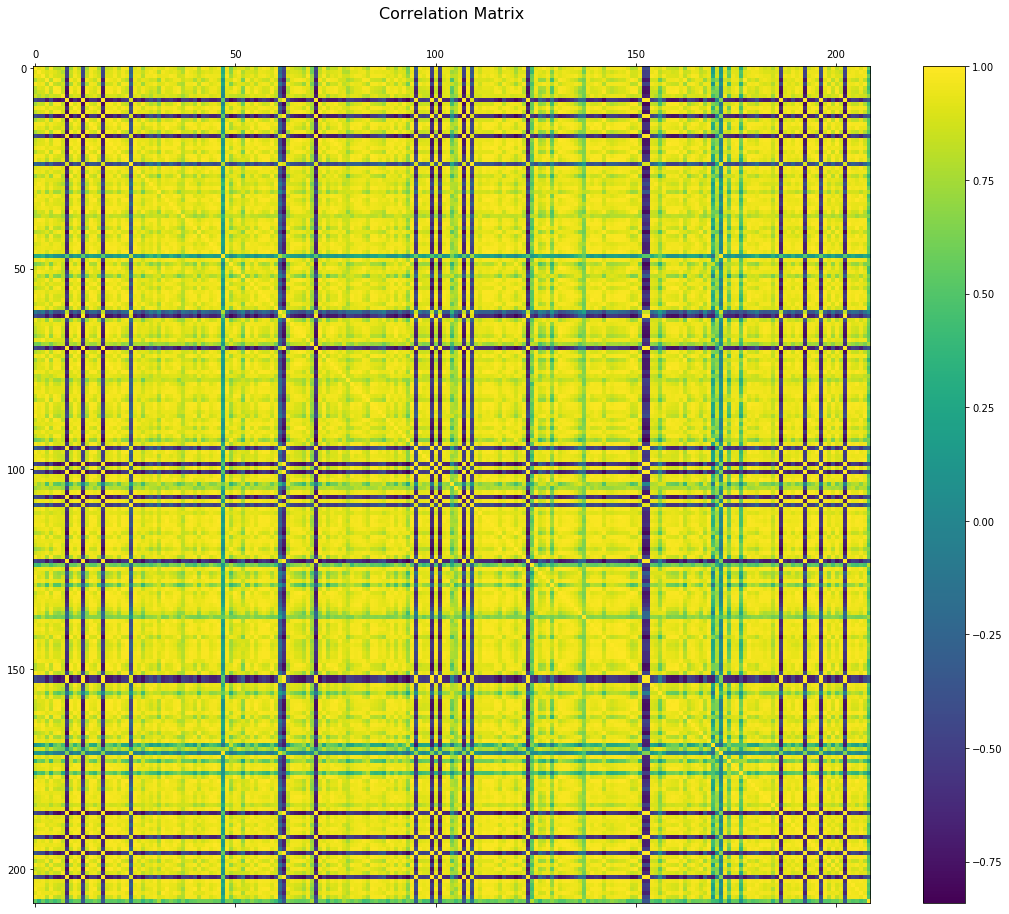

In [69]:
f = plt.figure(figsize=(19, 15))
plt.matshow(pivoted_GDP_df.corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params()
plt.title('Correlation Matrix', fontsize=16);

We then try to clusterize this correlation matrix in order to find countries whose GDP are correlated:

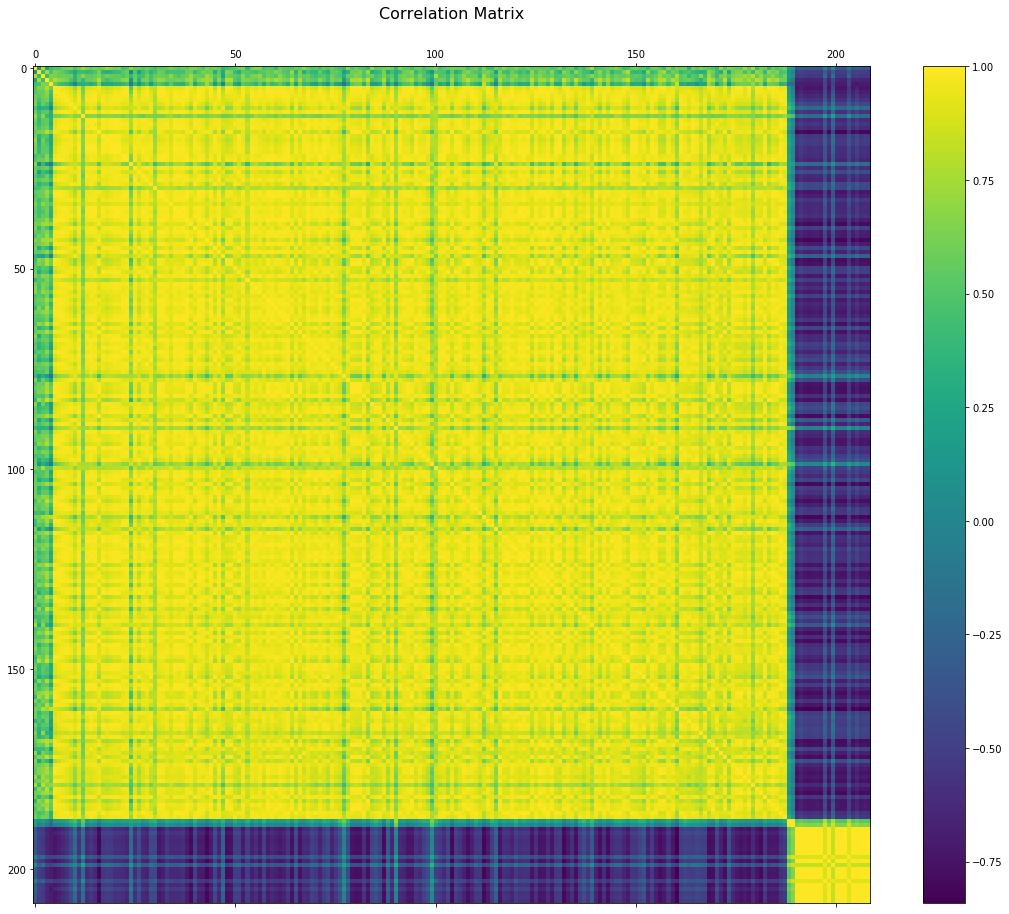

In [70]:
corr = pivoted_GDP_df.corr().values
pdist = spc.distance.pdist(corr)   # vector of ('55' choose 2) pairwise distances
linkage = spc.linkage(pdist, method='complete')
ind = spc.fcluster(linkage, 0.32*pdist.max(), 'distance')
columns = [pivoted_GDP_df.columns.tolist()[i] for i in list((np.argsort(ind)))]
clusterised_df = pivoted_GDP_df.reindex(columns, axis=1)

f = plt.figure(figsize=(19, 15))
plt.matshow(clusterised_df.corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params()
plt.title('Correlation Matrix', fontsize=16);

We have found regions in which the GDP is highly correlated and between which the correlation coefficent is lower. We could refine the big clusters by iterating this method.

**Interpretation:** The correlation matrix of GDP contains lots of values that are very closed to one. This means that **GDP in two different countries have a trend to evolve the same way**. Therefore, we can say that the world countries have **strong enough trading relations** to make the GDP evolve the same way. The fact that we have found some **main clusters** could be interpreted as regions in which the **trading relations are more important**.

#### 2.D. Economic classification of countries <a name="2D"></a>
Below, we plot the distribution of GDP over the world for the last decades:

In [76]:
plot = uni_df[['Area','Year']]
plot["Value"] = uni_df["(GDP, million $)"]
interact(lambda x: visualise_world_data_folium(plot,'Value',x),x=(1990,2010,1))

//anaconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


interactive(children=(IntSlider(value=2000, description='x', max=2010, min=1990), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

The countries with high **GDP** indeed correpond to the most **developped countries**. The **trends we can observe** from those plots look **very significant** (USSR dissolution, China economic growth, ...)

### 3. Descriptive data analysis  <a name="3"></a>

3. 

    1. [Production and consumption of food from a time-space geography point of view](#3A)
        
        1. [Net food exporters or importers](#3Aa)
        
        2. [Evolution over the last few decades](#3Ab)

    2. [Food self-sufficiency](#3B)

    3. [Analysis of food production and trade with GDP](#3C)
        
        1. [Correlation between production features and GDP](#3Ca)
        
        2. [Correlation between food trade features and GDP](#3Cb)
        
        3. [Machine learning model](#3Cc)  

    4. [Food prices stability and agricultural features](#3D)  
  

#### 3.A. Production and consumption of food from a time-space geography point of view <a name="3A"></a>

For the next milestone, this part will be put to the end of the file and conducted for **specific agricultural features** (e.g. trade of crop most highly correlated to GDP) after the **most important ones** have been **identified**.

#### 3.B. Food self-sufficiency <a name="3B"></a>
In this chapter, we take a look at the self suficiency score of the countries around the world and we focus on the agricultural features identified by our model.

In [78]:

# TO DELETE!!!

weights={'Apples Crops Production tonnes': 0.00038835122755090606,
 'Grapes Crops Production tonnes': 0.043072069534541305,
 'Wheat Food export quantities tonnes': 0.011350728929876288,
 'Soybeans Crops Production tonnes': -0.001271124985250068,
 'Maize Crops Production tonnes': 0.028315846463208876,
 'Turkeys Livestock production Head': 0.0056892714752312225}

In [92]:
if log:
    df_visu[to_visualise]=df_visu[to_visualise].apply(lambda x : np.log10(x))

# creating bins for color scaling
ma_value=df_visu[to_visualise].max()
mi_value=df_visu[to_visualise].min()
bins=np.linspace(mi_value,ma_value,8)

# creating Json string for folium
features=[]
for _,row in df_visu.iterrows():
    color=np.digitize(row[to_visualise],bins)
    feature={
        'type' : 'Feature',

        'properties':{'name':row['Country'],
                      'value': '{:.2E}'.format(np.power(10,row[to_visualise])),
                      'color':colors.to_hex(color_scale[color])},
        'geometry':row['geometry']
        }
    features.append(feature)

Year            Agg
count  273221.000000  273221.000000
mean     2007.957957       0.153065
std         4.497545       5.869650
min      1970.000000   -2373.852599
25%      2006.000000       0.000000
50%      2008.000000       0.000000
75%      2010.000000       0.000000
max      2015.000000    1795.577543

In [90]:
scores=compute_self_suficiency(uni_df,weights=weights)
scores=scores.reset_index()

In [99]:
scores.shape

(273221, 3)

In [109]:
scores[scores.Year==2010].describe()

Year           Agg
count  32977.0  32977.000000
mean    2010.0      0.024863
std        0.0      0.458152
min     2010.0    -17.709637
25%     2010.0      0.000000
50%     2010.0      0.000000
75%     2010.0      0.000000
max     2010.0     30.878269

In [108]:
visualise_world_data_folium(scores,'Agg',2010,log=False)

In [105]:
interact(lambda x : visualise_world_data_folium(scores,'Agg',x,log=False), x=(1960,2011,1))

interactive(children=(IntSlider(value=1985, description='x', max=2011, min=1960), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

#### 3.C. Analysis of food production and trade with GDP <a name="3C"></a>

##### 3.C.a. Food production and GDP <a name="3Ca"></a>

Out of the crops and the livestock produced, we will **focus on the top 20 crops** as well as **top 20 livestock produced globally** to be able to have a **model with a reasonable amount of features**. 

In [68]:
#Choose the top 20 crops produced in the world for the first model
crop_production_df= uni_df.filter(like='Crops Production tonnes') 
crop_production_df = crop_production_df.sum(axis=0).sort_values(ascending=False)
crop_production_list = crop_production_df.index.tolist()[:20]
crop_production_list.insert(0,'(GDP, million $)')
crop_production_list
#Take the top 20 crops and the columns of our uni_df which contain their production
maincrops_df = uni_df[crop_production_list]

#Livestock
livestock_production_df= uni_df.filter(like='Livestock production') 
livestock_production_df = livestock_production_df.sum(axis=0).sort_values(ascending=False)
livestock_production_list = livestock_production_df.index.tolist()[:20]
livestock_production_list.insert(0,'(GDP, million $)')
livestock_production_list
#Take the top 20 crops and the columns of our uni_df which contain their production
mainlivestock_df = uni_df[livestock_production_list]

top_production_list = crop_production_list +livestock_production_list[1:]

top_production_df = uni_df[top_production_list]
top_production_df.head(5)

(GDP, million $)  Cereals (Rice Milled Eqv) Crops Production tonnes  \
0       1748.886597                                          3390122.0   
1       1831.108982                                          3202450.0   
2       1595.555482                                          3816800.0   
3       1733.333275                                          4130140.0   
4       2155.555500                                          4211140.0   

   Sugar cane Crops Production tonnes  \
0                             55000.0   
1                             50000.0   
2                             35000.0   
3                             58000.0   
4                             51600.0   

   Vegetables&Melons, Total Crops Production tonnes  \
0                                          482000.0   
1                                          558000.0   
2                                          500000.0   
3                                          515000.0   
4                                          518000.0   

   Roots and Tubers,Total Crops Production tonnes  \
0                                        144000.0   
1                                        167000.0   
2                                        158000.0   
3                                        165000.0   
4                                        182000.0   

   Maize Crops Production tonnes  Wheat Crops Production tonnes  \
0                       667000.0                      2081000.0   
1                       670000.0                      1915000.0   
2                       720000.0                      2450000.0   
3                       760000.0                      2700000.0   
4                       770000.0                      2750000.0   

   Rice, paddy Crops Production tonnes  \
0                             366000.0   
1                             350000.0   
2                             400000.0   
3                             420000.0   
4                             420000.0   

   Fruit excl Melons,Total Crops Production tonnes  \
0                                         794600.0   
1                                         634800.0   
2                                         781400.0   
3                                         822500.0   
4                                         847500.0   

   Potatoes Crops Production tonnes  ...  Camels Livestock production Head  \
0                          144000.0  ...                          300000.0   
1                          167000.0  ...                          300000.0   
2                          158000.0  ...                          300000.0   
3                          165000.0  ...                          300000.0   
4                          182000.0  ...                          300000.0   

   Poultry Birds Livestock production 1000 Head  \
0                                        6000.0   
1                                        6000.0   
2                                        6000.0   
3                                        6100.0   
4                                        6100.0   

   Mules Livestock production Head  Chickens Livestock production 1000 Head  \
0                          35000.0                                   6000.0   
1                          35000.0                                   6000.0   
2                          31000.0                                   6000.0   
3                          26500.0                                   6100.0   
4                          26500.0                                   6100.0   

   Camelids, other Livestock production Head  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   Animals live nes Livestock production Head  \
0                                         0.0   
1                                         

In [69]:
#Checking correlations of main crops between each other and with GDP
top_production_correlation_matrix = round (top_production_df.corr(method='pearson'),3)
top_production_correlation_matrix['(GDP, million $)'].sort_values(ascending = False)

(GDP, million $)                                         1.000
Maize Crops Production tonnes                            0.779
Turkeys Livestock production 1000 Head                   0.705
Soybeans Crops Production tonnes                         0.658
Cereals (Rice Milled Eqv) Crops Production tonnes        0.654
Chickens Livestock production 1000 Head                  0.578
Poultry Birds Livestock production 1000 Head             0.568
Tomatoes Crops Production tonnes                         0.550
Citrus Fruit,Total Crops Production tonnes               0.535
Wheat Crops Production tonnes                            0.508
Fruit excl Melons,Total Crops Production tonnes          0.494
Grapes Crops Production tonnes                           0.452
Horses Livestock production Head                         0.432
Sorghum Crops Production tonnes                          0.410
Sugar beet Crops Production tonnes                       0.395
Vegetables&Melons, Total Crops Production tonnes       

Because "Cereals (Rice Milled Eqv) Crops Production tonnes" has such a high correlation with a lot of other features, it is **probably an aggregate of them** (eg over 90% with wheat).

We would know like to look at some **relationships between these measures and the GDP**:

C:\Users\nanil\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


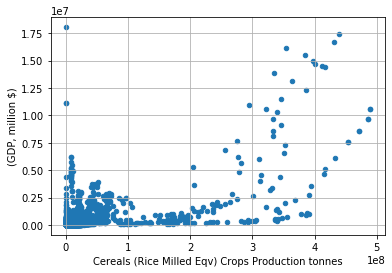

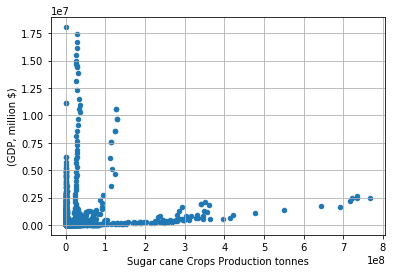

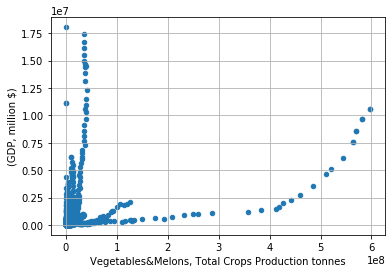

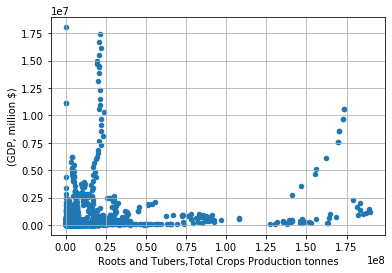

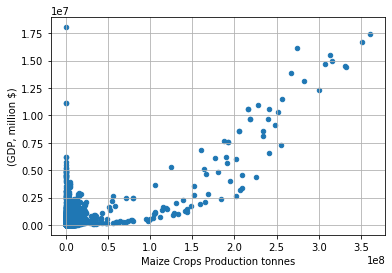

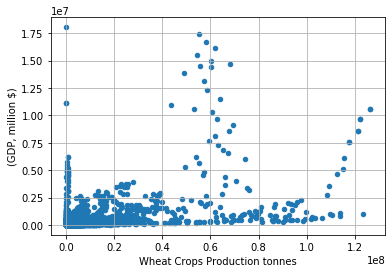

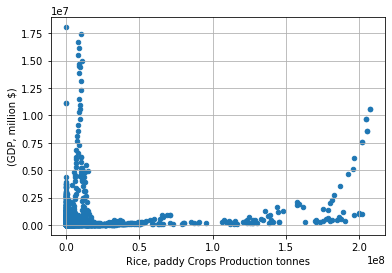

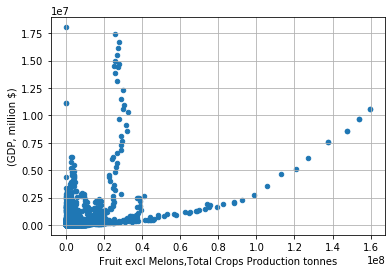

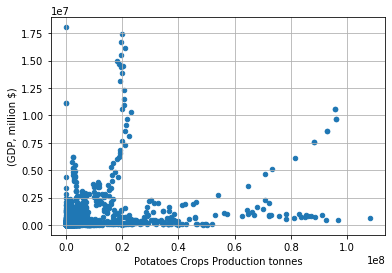

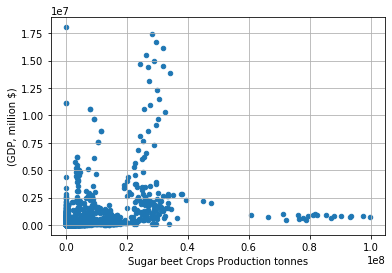

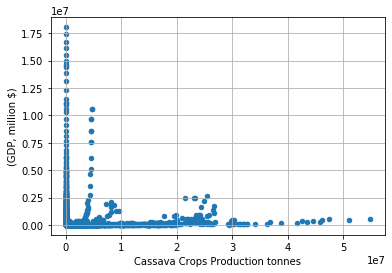

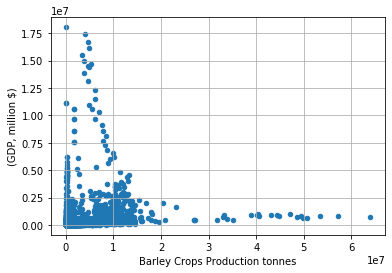

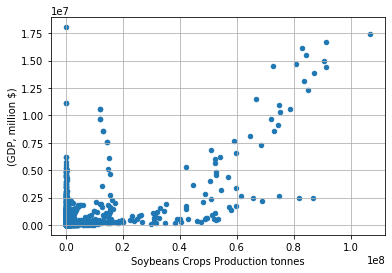

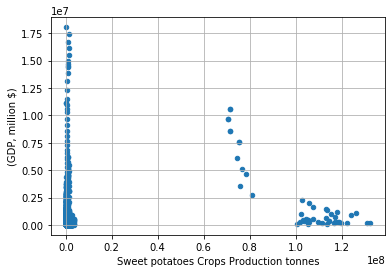

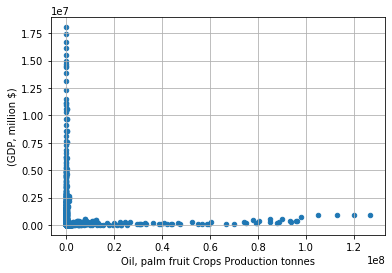

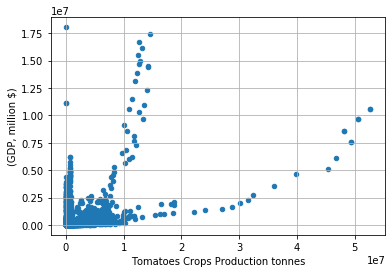

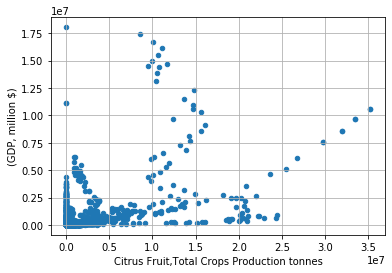

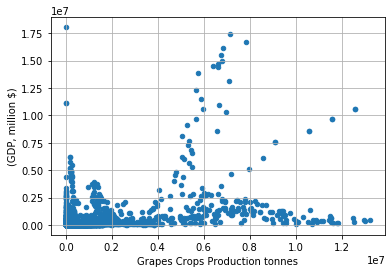

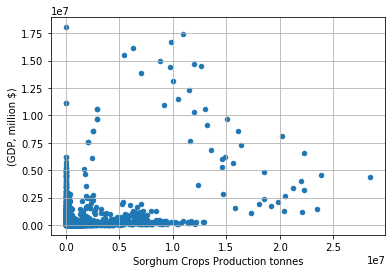

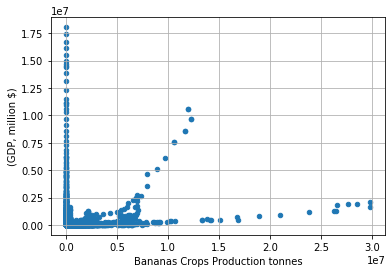

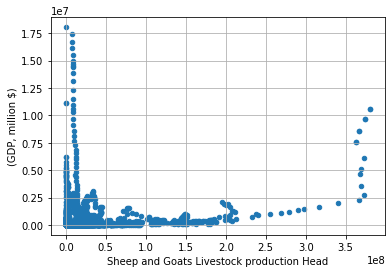

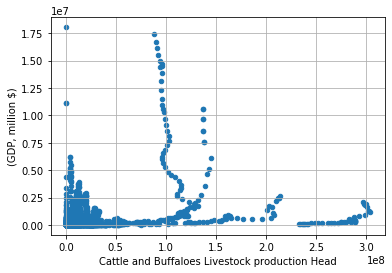

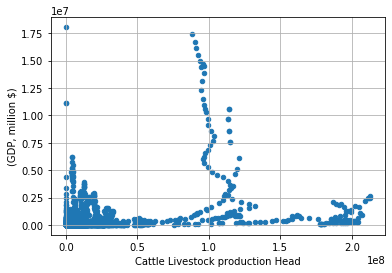

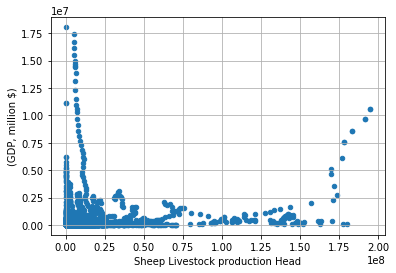

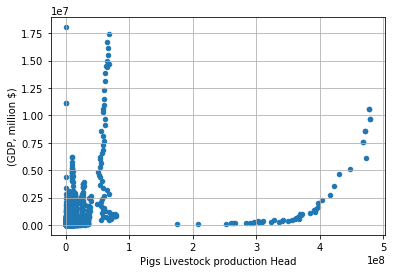

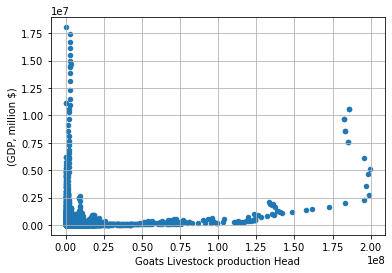

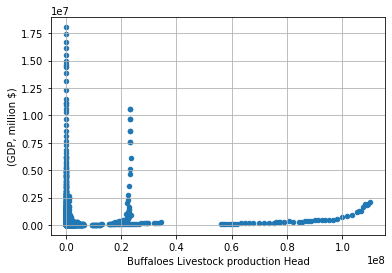

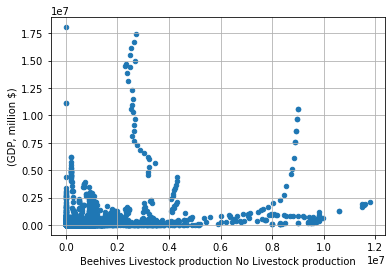

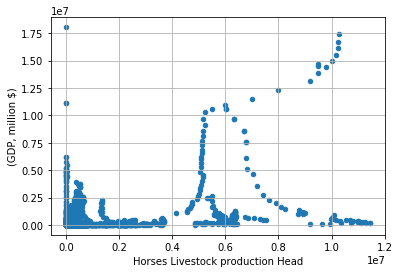

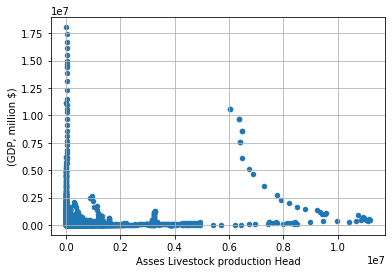

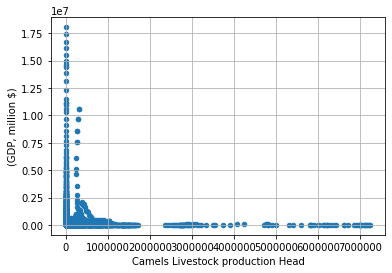

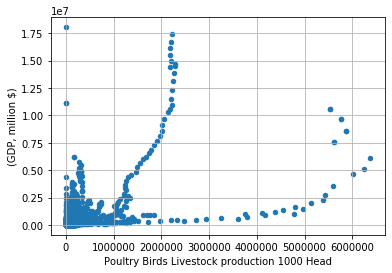

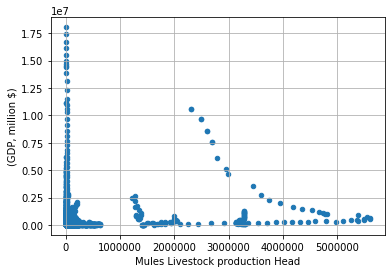

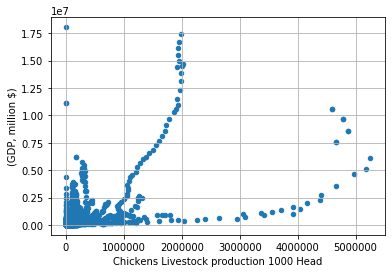

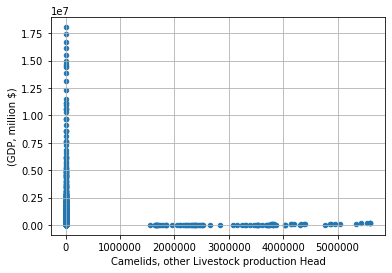

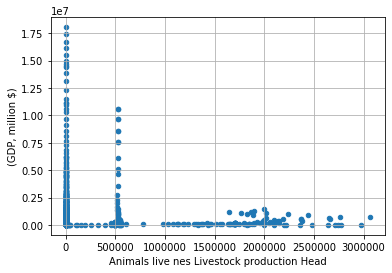

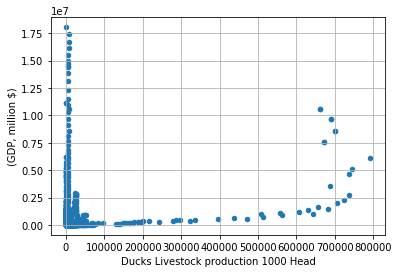

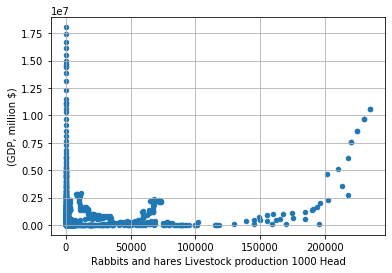

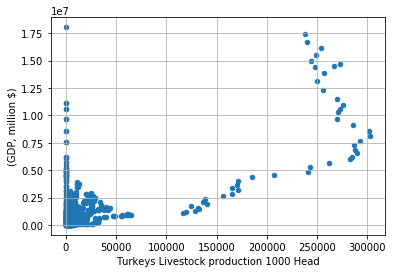

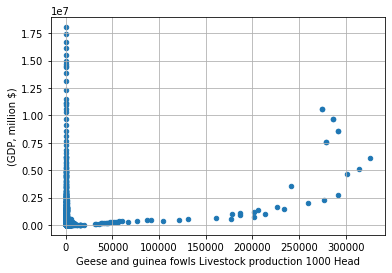

In [70]:
#Looking at some relationships
for item in list(top_production_df.columns)[1:]:
    top_production_df.plot(kind='scatter', x=item, y='(GDP, million $)', grid=True)


We can quite clearly see that the production of many of the most popular crops can well be related to GDP.

##### 3.C.b. Trade and GDP <a name="3Cb"></a>

Let's see if the same can be said about the most exported/imported goods.

In [71]:
#Choose the top 20 most exported items by mass
top_exports_df= uni_df.filter(like='export quantities tonnes')
top_exports_df = top_exports_df.sum(axis=0).sort_values(ascending=False)
top_exports_list =top_exports_df.index.tolist()[:20]
top_exports_list

#Take the top 20 exported crops and the columns of our uni_df which contain their production
top_exports_list.insert(0,'(GDP, million $)')
top_exports_df = uni_df[top_exports_list]


#Choose the top 20 most imported items by mass
top_imports_df= uni_df.filter(like='import quantities tonnes')
top_imports_df = top_imports_df.sum(axis=0).sort_values(ascending=False)

top_imports_list =top_imports_df.index.tolist()[:20]
top_imports_list

#Take the top 20 imported items and the columns of our uni_df which contain their production
top_imports_list.insert(0,'(GDP, million $)')
top_imports_df = uni_df[top_imports_list]

#Create a joined list
top_traded_list = top_exports_list +top_imports_list[1:]

In [72]:
top_traded_df = uni_df[top_traded_list]
top_traded_df.sample(5)

(GDP, million $)  Cereals Food export quantities tonnes  \
353      291334.718270                             23308722.0   
7600        444.775423                                    2.0   
4925       2976.405866                                 4176.0   
5282     219661.266640                                 4733.0   
4845      55146.908740                                77580.0   

      Wheat+Flour,Wheat Equivalent Food export quantities tonnes  \
353                                          11307642.0            
7600                                                0.0            
4925                                              276.0            
5282                                                0.0            
4845                                            45373.0            

      Wheat Food export quantities tonnes  \
353                            10790517.0   
7600                                  0.0   
4925                                  0.0   
5282                                  0.0   
4845                              13326.0   

      Maize Food export quantities tonnes  \
353                            10934068.0   
7600                                  0.0   
4925                                450.0   
5282                               3743.0   
4845                                714.0   

      Fodder & Feeding stuff Food export quantities tonnes  \
353                                          16527012.0      
7600                                              432.0      
4925                                            23152.0      
5282                                             4052.0      
4845                                            52015.0      

      Milk Equivalent Food export quantities tonnes  \
353                                        953169.0   
7600                                          208.0   
4925                                          188.0   
5282                                           28.0   
4845                                       331431.0   

      Oilseeds Food export quantities tonnes  \
353                                7639942.0   
7600                                     0.0   
4925                                  2901.0   
5282                                 35827.0   
4845                                  7029.0   

      Sugar and Honey Food export quantities tonnes  \
353                                        325877.0   
7600                                            0.0   
4925                                        61101.0   
5282                                       458633.0   
4845                                          453.0   

      Oilseed Cake Meal Food export quantities tonnes  ...  \
353                                        15922637.0  ...   
7600                                              0.0  ...   
4925                                          18800.0  ...   
5282                                              0.0  ...   
4845                                           5690.0  ...   

      Animal Vegetable Oil Food import quantities tonnes  \
353                                             50692.0    
7600                                            19246.0    
4925                                            14135.0    
5282                                           259116.0    
4845                                             7113.0    

      Sugar,Total (Raw Equiv.) Food import quantities tonnes  \
353                                              1370.0        
7600                                            52731.0        
4925                                               67.0        
5282                                             1759.0        
4845                                             3704.0        

      Cake, soybeans Food import quantities tonnes  \
353                                           43.0   
7600                                           0.0   
4925                                        1000.0   
5282 

We now check the **correlations** of main traded goods **with GDP**:

In [73]:
top_traded_correlation_matrix = round (top_traded_df.corr(method='pearson'),3)
top_traded_correlation_matrix['(GDP, million $)'].sort_values(ascending = False)

(GDP, million $)                                                        1.000
Oilseeds Food export quantities tonnes                                  0.634
Soybeans Food export quantities tonnes                                  0.615
Maize Food export quantities tonnes                                     0.612
Cereals Food export quantities tonnes                                   0.608
Fodder & Feeding stuff Food export quantities tonnes                    0.557
Sugar and Honey Food import quantities tonnes                           0.539
Wheat+Flour,Wheat Equivalent Food export quantities tonnes              0.533
Wheat Food export quantities tonnes                                     0.530
Animal Vegetable Oil Food import quantities tonnes                      0.502
Fixed Vegetable Oils Food import quantities tonnes                      0.494
Beverages Food import quantities tonnes                                 0.463
Sugar,Total (Raw Equiv.) Food import quantities tonnes          

It seems that the highest correlations can be found from **exports of meat as well** as **feeding stuff**. 

We would know like to look at some **relationships between these measures and the GDP**:

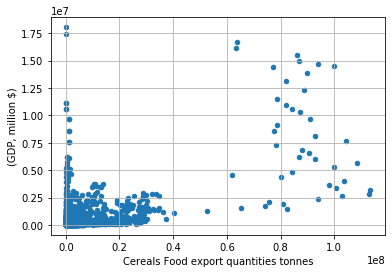

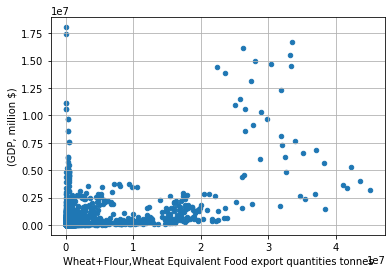

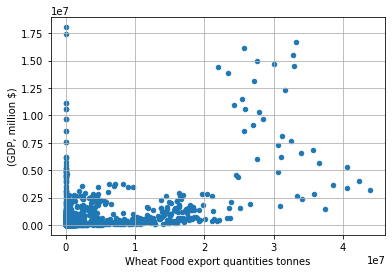

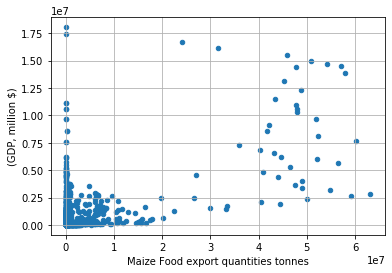

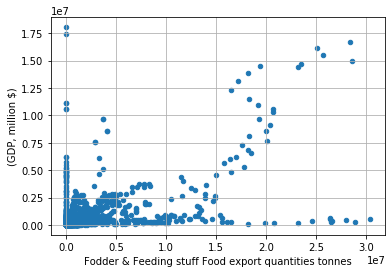

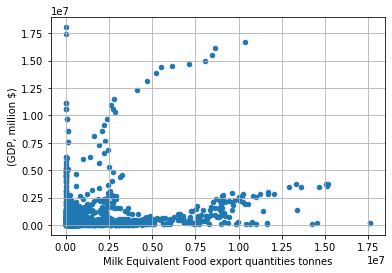

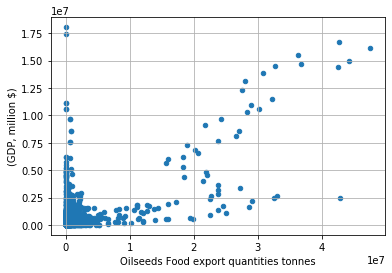

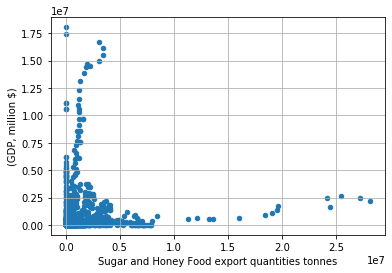

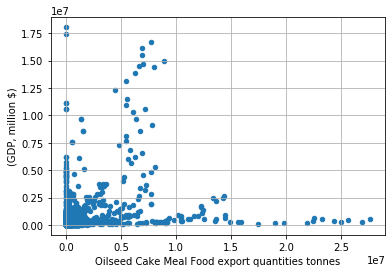

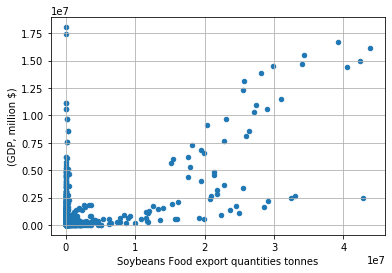

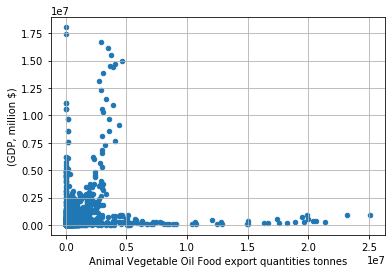

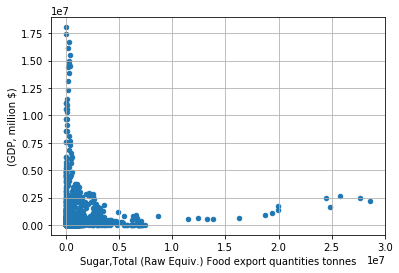

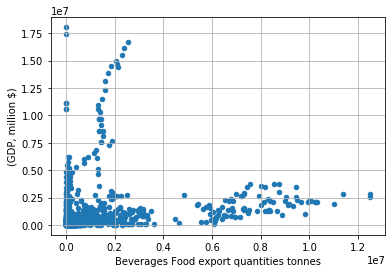

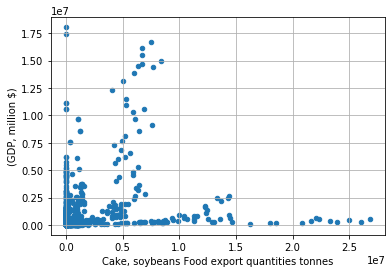

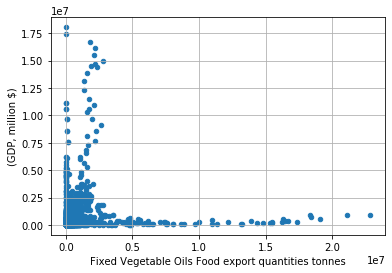

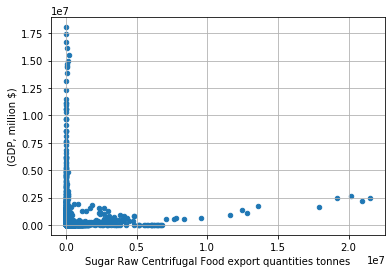

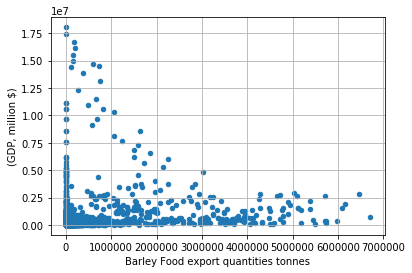

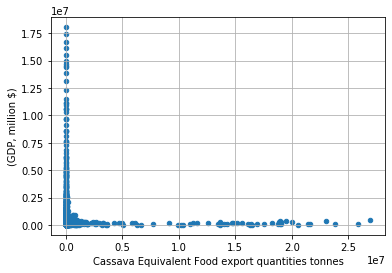

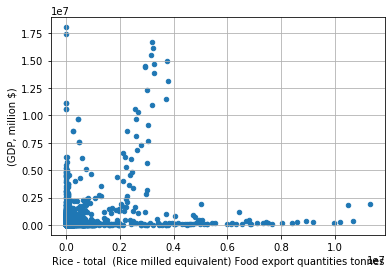

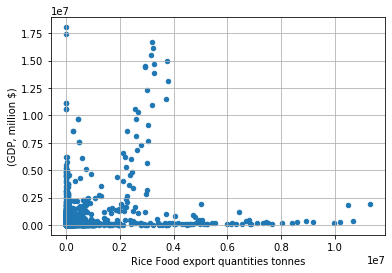

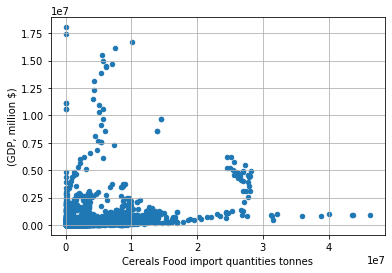

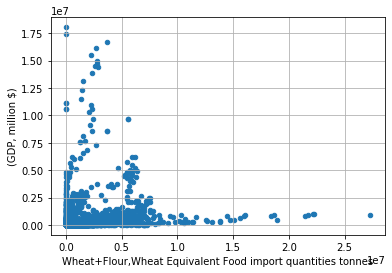

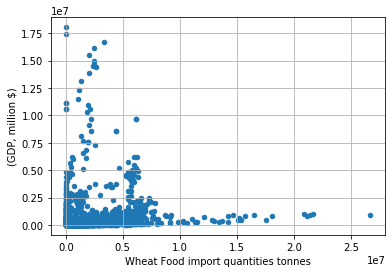

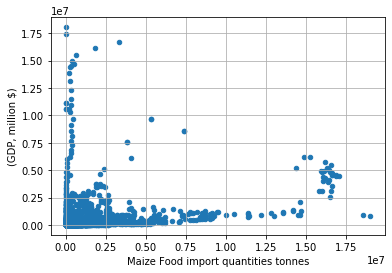

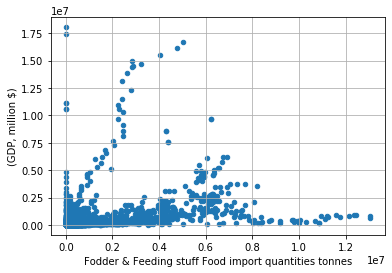

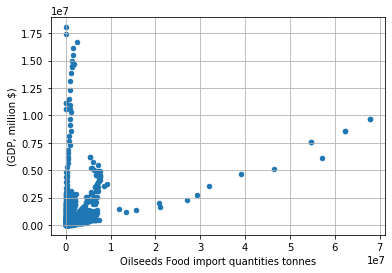

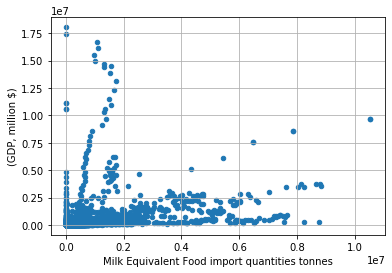

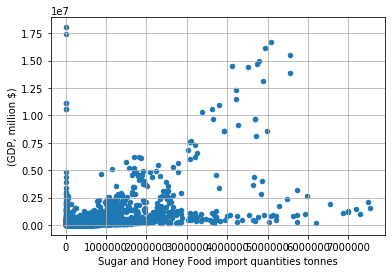

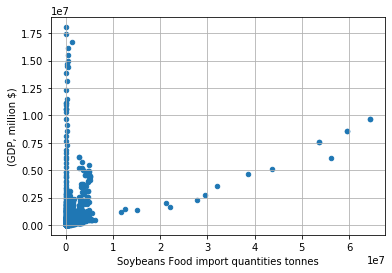

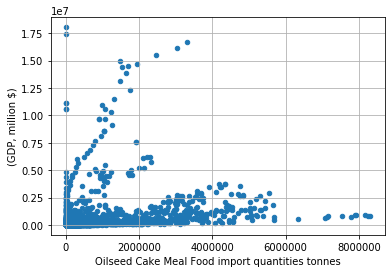

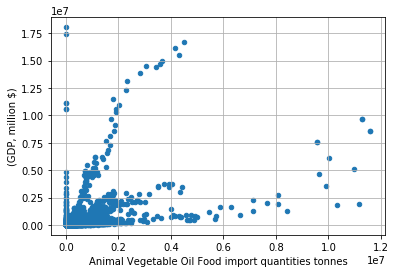

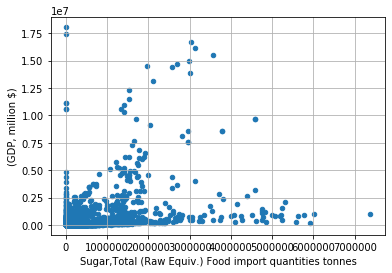

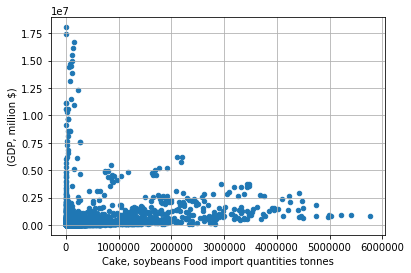

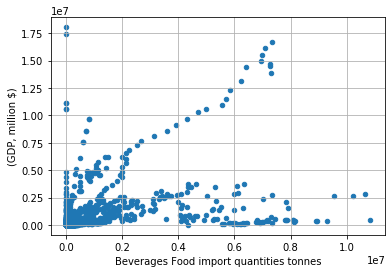

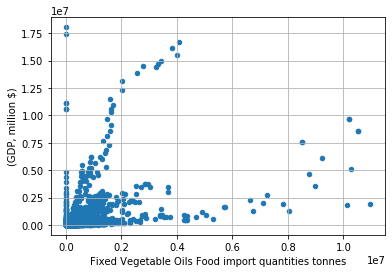

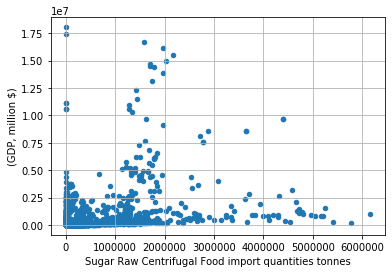

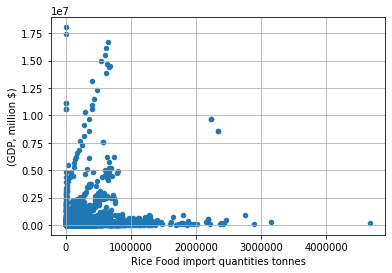

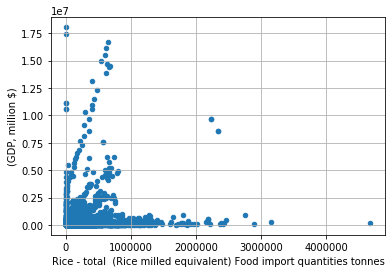

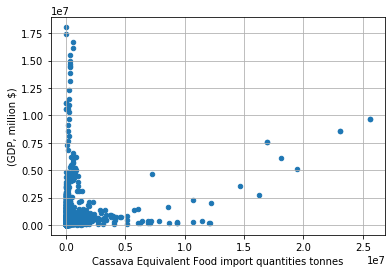

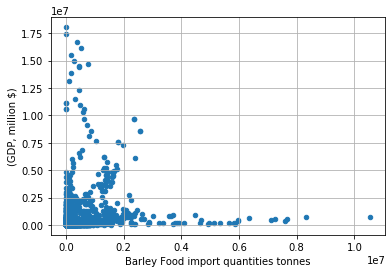

In [74]:
for item in list(top_traded_df.columns)[1:]:
    top_traded_df.plot(kind='scatter', x=item, y='(GDP, million $)', grid=True)

##### 3.C.c. Machine learning model <a name="3Cc"></a>

3. 

    3. 
        
        3. 
        
            1. [Model - based on trade](#3Cci)  
        
            2. [Model - based on production](#3Ccii) 

###### 3.C.c.i. Model - based on production <a name="3Cci"></a>

First, we only create a model using **only the production data**. Afterwards, we use the data on exports, imports. 

#### Standardization, scaling


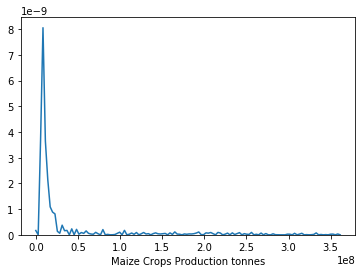

In [75]:
_ = sns.distplot(top_production_df["Maize Crops Production tonnes"], rug=False, hist=False)

C:\Users\nanil\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


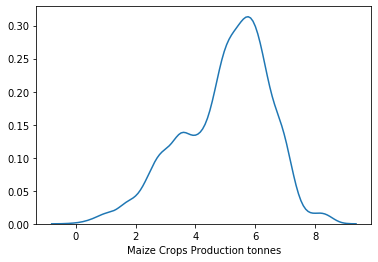

In [76]:
_ = sns.distplot(np.log10(top_production_df["Maize Crops Production tonnes"]), rug=False, hist=False)

We notice that the production of goods, just as the GDP, has a more "normal looking" distribution when we use the logscale. We will thus create a new uniformed dataframe, with applying the logarithm to all values.

In [77]:
#Using 1+x so as to keep 0 values to 0.
def log(x):
    return np.log10(1+x)

In [78]:
#create a new dataframe with log values, so that we have normal distributions for later analysis
uni_df_log = uni_df.copy()
uni_df_log.iloc[:,2:] = uni_df_log.iloc[:,2:].apply(lambda x : log(x))

C:\Users\nanil\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [79]:
top_production_log_df = uni_df_log[top_production_list]
top_production_log_df.sample(5)

(GDP, million $)  Cereals (Rice Milled Eqv) Crops Production tonnes  \
96            4.122569                                           6.170096   
4311          3.948574                                           6.431120   
3362          2.671217                                           0.000000   
6570          5.241039                                           7.258743   
5504          1.653275                                           1.681241   

      Sugar cane Crops Production tonnes  \
96                              0.000000   
4311                            6.584964   
3362                            0.000000   
6570                            7.531479   
5504                            0.000000   

      Vegetables&Melons, Total Crops Production tonnes  \
96                                            5.781681   
4311                                          5.679965   
3362                                          0.000000   
6570                                          6.767949   
5504                                          2.716838   

      Roots and Tubers,Total Crops Production tonnes  \
96                                          5.596223   
4311                                        6.185093   
3362                                        0.000000   
6570                                        6.445955   
5504                                        2.214844   

      Maize Crops Production tonnes  Wheat Crops Production tonnes  \
96                         3.633064                       6.037869   
4311                       6.361728                       5.403122   
3362                       0.000000                       0.000000   
6570                       6.840622                       0.000000   
5504                       1.681241                       0.000000   

      Rice, paddy Crops Production tonnes  \
96                               3.401573   
4311                             4.648896   
3362                             0.000000   
6570                             7.225711   
5504                             0.000000   

      Fruit excl Melons,Total Crops Production tonnes  \
96                                           6.230201   
4311                                         6.050889   
3362                                         0.000000   
6570                                         7.195645   
5504                                         2.860937   

      Potatoes Crops Production tonnes  ...  Camels Livestock production Head  \
96                            5.596223  ...                          5.216907   
4311                          5.619527  ...                          5.832510   
3362                          0.000000  ...                          0.000000   
6570                          5.083904  ...                          0.000000   
5504                          2.152288  ...                          0.000000   

      Poultry Birds Livestock production 1000 Head  \
96                                        4.196563   
4311                                      4.293628   
3362                                      0.000000   
6570                                      5.219456   
5504                                      1.568202   

      Mules Livestock production Head  \
96                           5.281808   
4311                         0.000000   
3362                         0.000000   
6570                         0.000000   
5504                         0.000000   

      Chickens Livestock production 1000 Head  \
96                                   4.194847   
4311                                 4.293628   
3362                                 0.000000   
6570                                 5.188290   
5504                                 1.568202   

      Camelids, other Livestock production Head  \
96                                          0.0   
4311                                        0.0   
3362                                        0.0   

In [80]:
#We then normalize the data, so as to have comparable ranges. We use the dataframe of log values.

top_production_values = top_production_log_df.values
standard_scaler = preprocessing.StandardScaler()
top_production_stand_values =standard_scaler.fit_transform(top_production_values)
top_production_stand = pd.DataFrame(top_production_stand_values, columns=top_production_log_df.columns)
top_production_stand.sample(5)

(GDP, million $)  Cereals (Rice Milled Eqv) Crops Production tonnes  \
4185          1.639827                                           0.947836   
4517         -0.101849                                           0.725672   
6292          1.132263                                           1.101104   
3793          0.035873                                          -1.730871   
4435          0.502289                                          -0.441927   

      Sugar cane Crops Production tonnes  \
4185                            1.157581   
4517                            0.936832   
6292                            1.600487   
3793                           -0.900328   
4435                           -0.900328   

      Vegetables&Melons, Total Crops Production tonnes  \
4185                                          1.224529   
4517                                          0.563986   
6292                                          1.014918   
3793                                         -0.565207   
4435                                          0.255141   

      Roots and Tubers,Total Crops Production tonnes  \
4185                                        0.953439   
4517                                        0.451291   
6292                                        0.763853   
3793                                       -0.336720   
4435                                       -0.148076   

      Maize Crops Production tonnes  Wheat Crops Production tonnes  \
4185                       0.205186                       0.897384   
4517                       0.945103                      -0.986939   
6292                       1.118643                       1.578925   
3793                      -1.410905                      -0.986939   
4435                      -0.430784                      -0.064125   

      Rice, paddy Crops Production tonnes  \
4185                             1.625899   
4517                             1.347919   
6292                             1.508385   
3793                            -1.019020   
4435                            -1.019020   

      Fruit excl Melons,Total Crops Production tonnes  \
4185                                         1.032032   
4517                                         0.398749   
6292                                         1.017742   
3793                                        -1.749836   
4435                                        -0.422048   

      Potatoes Crops Production tonnes  ...  Camels Livestock production Head  \
4185                          1.178579  ...                         -0.481401   
4517                          0.434695  ...                         -0.481401   
6292                          1.057711  ...                          2.520207   
3793                          0.197527  ...                         -0.481401   
4435                          0.352527  ...                          1.357185   

      Poultry Birds Livestock production 1000 Head  \
4185                                      1.229320   
4517                                      0.604047   
6292                                      1.221682   
3793                                     -0.737481   
4435                                      0.643330   

      Mules Livestock production Head  \
4185                        -0.726811   
4517                        -0.726811   
6292                         1.818580   
3793                        -0.726811   
4435                        -0.726811   

      Chickens Livestock production 1000 Head  \
4185                                 1.250675   
4517                                 0.581352   
6292                                 1.238889   
3793                                -0.729720   
4435                                 0.660649   

      Camelids, other Livestock production Head  \
4185                                  -0.099386   
4517                                  -0.099386   
6292                                  -0.099386   

In [81]:
train_set, test_set = train_test_split(top_production_stand.values, test_size = 0.2, random_state = 1)

X_train_set = train_set[:,1:]
Y_train_set = train_set[:,0]

X_test_set = test_set[:,1:]
Y_test_set = test_set[:,0]

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:05<00:00, 15.33it/s]


The best value obtained is for alpha equal to 0.06 with a MSE of 0.32763200811215515


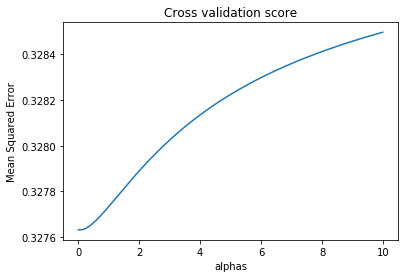

In [82]:
number_of_folds = 5
scores = []
list_of_alpha = [i for i in np.arange(0,10,0.01)]
for alpha in tqdm(list_of_alpha):
    clf = Ridge(alpha = alpha)
    score = cross_val_score(clf, X_train_set, Y_train_set, cv=number_of_folds, scoring = 'neg_mean_squared_error')
    scores.append([alpha, score.mean()])
a=np.array(scores)
best_alpha = a[np.where(a==np.amax(a[:,1]))[0]][0,0]
print("The best value obtained is for alpha equal to " + str(best_alpha) + " with a MSE of "+ str(-a[np.where(a==np.amax(a[:,1]))[0]][0,1]))
alphas = [elt[0] for elt in scores]
MSE = [-elt[1] for elt in scores]
sns.lineplot(alphas, MSE)
_ = plt.title("Cross validation score")
_ = plt.ylabel("Mean Squared Error")
_ = plt.xlabel("alphas")

In [83]:
# We build our model with the chosen alpha.
model_top_production = Ridge(alpha=best_alpha)
model_top_production.fit(X_train_set, Y_train_set)

Ridge(alpha=0.06, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [84]:
weights_top_production = pd.DataFrame([model_top_production.coef_], columns=top_production_df.columns[1:])
weights_top_production = weights_top_production.sort_values(by=0, axis=1, ascending=False)                                  
weights_top_production

Poultry Birds Livestock production 1000 Head  \
0                                      1.486112   

   Cattle and Buffaloes Livestock production Head  \
0                                          0.6384   

   Potatoes Crops Production tonnes  Tomatoes Crops Production tonnes  \
0                           0.22552                          0.187854   

   Sheep Livestock production Head  Sugar beet Crops Production tonnes  \
0                         0.145461                             0.13441   

   Turkeys Livestock production 1000 Head  \
0                                0.114564   

   Oil, palm fruit Crops Production tonnes  Wheat Crops Production tonnes  \
0                                 0.109679                       0.103595   

   Horses Livestock production Head  ...  \
0                          0.094869  ...   

   Vegetables&Melons, Total Crops Production tonnes  \
0                                         -0.053963   

   Rice, paddy Crops Production tonnes  \
0                            -0.085615   

   Geese and guinea fowls Livestock production 1000 Head  \
0                                          -0.098977       

   Pigs Livestock production Head  Asses Livestock production Head  \
0                       -0.117822                        -0.179584   

   Sheep and Goats Livestock production Head  \
0                                  -0.255719   

   Fruit excl Melons,Total Crops Production tonnes  \
0                                        -0.328864   

   Roots and Tubers,Total Crops Production tonnes  \
0                                       -0.346439   

   Cattle Livestock production Head  Chickens Livestock production 1000 Head  
0                          -0.54638                                -0.769241  

[1 rows x 40 columns]

In [85]:
model_top_production.score(X_train_set, Y_train_set)

0.6696735614504745

Results are so far middling, but it also need cleaning since there's some aggregate values (e.g. including "total" in their name, that need to be removed). We will continue working on this for next milestone.

###### 3.C.c.ii. Model - based on trade <a name="3Ccii"></a>

In [86]:
#Use dataframe with log values
top_traded_log_df = uni_df_log[top_traded_list]

In [87]:
#We then normalize the data, so as to have comparable ranges. We use the dataframe of log values.

top_traded_values = top_traded_log_df.values
standard_scaler = preprocessing.StandardScaler()
top_traded_stand_values =standard_scaler.fit_transform(top_traded_values)
top_traded_stand = pd.DataFrame(top_production_stand_values, columns=top_traded_log_df.columns)
top_traded_stand.sample(5)

(GDP, million $)  Cereals Food export quantities tonnes  \
7941          1.285471                               0.796189   
3971         -0.055026                               0.697968   
2295          0.282115                               0.243769   
4399         -0.073989                              -1.730871   
6326         -1.597925                              -1.730871   

      Wheat+Flour,Wheat Equivalent Food export quantities tonnes  \
7941                                          -0.900328            
3971                                           0.683561            
2295                                          -0.900328            
4399                                          -0.900328            
6326                                          -0.900328            

      Wheat Food export quantities tonnes  \
7941                             0.396023   
3971                             0.814221   
2295                             0.245600   
4399                            -2.255956   
6326                            -2.255956   

      Maize Food export quantities tonnes  \
7941                             0.669842   
3971                             0.260651   
2295                             0.205365   
4399                            -2.155906   
6326                            -2.155906   

      Fodder & Feeding stuff Food export quantities tonnes  \
7941                                          -1.410905      
3971                                           0.683350      
2295                                          -1.410905      
4399                                          -1.410905      
6326                                          -1.410905      

      Milk Equivalent Food export quantities tonnes  \
7941                                       1.153329   
3971                                       1.173206   
2295                                       0.467848   
4399                                      -0.986939   
6326                                      -0.986939   

      Oilseeds Food export quantities tonnes  \
7941                               -1.019020   
3971                                0.910553   
2295                               -1.019020   
4399                               -1.019020   
6326                               -1.019020   

      Sugar and Honey Food export quantities tonnes  \
7941                                       0.214314   
3971                                       0.704690   
2295                                       0.321528   
4399                                      -2.345133   
6326                                      -2.345133   

      Oilseed Cake Meal Food export quantities tonnes  ...  \
7941                                         1.024573  ...   
3971                                         0.688359  ...   
2295                                         0.640184  ...   
4399                                        -1.297216  ...   
6326                                        -1.297216  ...   

      Animal Vegetable Oil Food import quantities tonnes  \
7941                                          -0.481401    
3971                                           1.605219    
2295                                          -0.481401    
4399                                          -0.481401    
6326                                          -0.481401    

      Sugar,Total (Raw Equiv.) Food import quantities tonnes  \
7941                                           0.392350        
3971                                           0.080420        
2295                                           0.177616        
4399                                          -2.155140        
6326                                          -2.155140        

      Cake, soybeans Food import quantities tonnes  \
7941                                     -0.726811   
3971                                      1.233795   
2295                                      0.830080   
4399 

In [88]:
train_set, test_set = train_test_split(top_traded_stand.values, test_size = 0.2, random_state = 1)

X_train_set = train_set[:,1:]
Y_train_set = train_set[:,0]

X_test_set = test_set[:,1:]
Y_test_set = test_set[:,0]

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:06<00:00, 14.99it/s]


The best value obtained is for alpha equal to 0.06 with a MSE of 0.32763200811215515


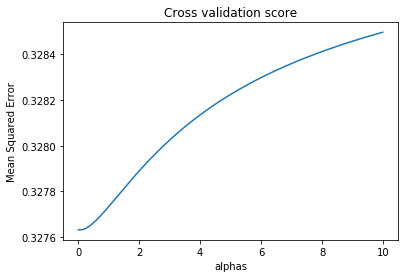

In [89]:
number_of_folds = 5
scores = []
list_of_alpha = [i for i in np.arange(0,10,0.01)]
for alpha in tqdm(list_of_alpha):
    clf = Ridge(alpha = alpha)
    score = cross_val_score(clf, X_train_set, Y_train_set, cv=number_of_folds, scoring = 'neg_mean_squared_error')
    scores.append([alpha, score.mean()])
a=np.array(scores)
best_alpha = a[np.where(a==np.amax(a[:,1]))[0]][0,0]
print("The best value obtained is for alpha equal to " + str(best_alpha) + " with a MSE of "+ str(-a[np.where(a==np.amax(a[:,1]))[0]][0,1]))
alphas = [elt[0] for elt in scores]
MSE = [-elt[1] for elt in scores]
sns.lineplot(alphas, MSE)
_ = plt.title("Cross validation score")
_ = plt.ylabel("Mean Squared Error")
_ = plt.xlabel("alphas")

In [90]:
# We build our model with the chosen alpha.
model_trade = Ridge(alpha=best_alpha)
model_trade.fit(X_train_set, Y_train_set)

Ridge(alpha=0.06, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [91]:
weights_trade = pd.DataFrame([model_trade.coef_], columns=top_traded_stand.columns[1:])
weights_trade = weights_trade.sort_values(by=0, axis=1, ascending=False)                                  
weights_trade

Sugar,Total (Raw Equiv.) Food import quantities tonnes  \
0                                           1.486112        

   Wheat+Flour,Wheat Equivalent Food import quantities tonnes  \
0                                             0.6384            

   Oilseed Cake Meal Food export quantities tonnes  \
0                                          0.22552   

   Sugar Raw Centrifugal Food export quantities tonnes  \
0                                           0.187854     

   Maize Food import quantities tonnes  \
0                             0.145461   

   Soybeans Food export quantities tonnes  \
0                                 0.13441   

   Cassava Equivalent Food import quantities tonnes  \
0                                          0.114564   

   Fixed Vegetable Oils Food export quantities tonnes  \
0                                           0.109679    

   Milk Equivalent Food export quantities tonnes  \
0                                       0.103595   

   Soybeans Food import quantities tonnes  ...  \
0                                0.094869  ...   

   Wheat Food export quantities tonnes  \
0                            -0.053963   

   Oilseeds Food export quantities tonnes  \
0                               -0.085615   

   Barley Food import quantities tonnes  \
0                             -0.098977   

   Fodder & Feeding stuff Food import quantities tonnes  \
0                                          -0.117822      

   Oilseed Cake Meal Food import quantities tonnes  \
0                                        -0.179584   

   Cereals Food import quantities tonnes  \
0                              -0.255719   

   Sugar and Honey Food export quantities tonnes  \
0                                      -0.328864   

   Maize Food export quantities tonnes  Wheat Food import quantities tonnes  \
0                            -0.346439                             -0.54638   

   Beverages Food import quantities tonnes  
0                                -0.769241  

[1 rows x 40 columns]

In [92]:
model_trade.score(X_train_set, Y_train_set)

0.6696735614504745

This models also needs to be cleaned, because the one with lowest weights is actually a part of the one with highest. 

But it seems we can already draw some **conclusions**: **cake, soybeans, as well as oilseed cake meal food and fodder & Feeding stuff** are all used as animal feed. The fact that they're among the **features with the highest weights** clearly indicates that there's **a link between GDP and high amounts of imports of animal feed**. 

#### 3.D. Food prices stability and agricultural features <a name="3D"></a>

In [95]:
#creating the matrices starting from 2000
top_production_list.insert(1,'(Consumer price indices, %)')
top_traded_list.insert(1,'(Consumer price indices, %)')
top_production_2000_df = uni_df_2000[top_production_list]
top_traded_2000_df = uni_df_2000[top_traded_list]

In [109]:
#Checking correlations of main crops between each other and CPI
top_production_correlation_matrix = round (top_production_2000_df.corr(method='pearson'),3)
top_production_correlation_matrix['(Consumer price indices, %)'].sort_values(ascending = False)

(Consumer price indices, %)                              1.000
Cassava Crops Production tonnes                          0.069
Beehives Livestock production No Livestock production    0.030
Roots and Tubers,Total Crops Production tonnes           0.022
Asses Livestock production Head                          0.022
Goats Livestock production Head                          0.019
Bananas Crops Production tonnes                          0.018
Sheep and Goats Livestock production Head                0.015
Cattle and Buffaloes Livestock production Head           0.012
Cattle Livestock production Head                         0.012
Sheep Livestock production Head                          0.009
Buffaloes Livestock production Head                      0.008
Sorghum Crops Production tonnes                          0.007
Sugar cane Crops Production tonnes                       0.005
Barley Crops Production tonnes                           0.005
Fruit excl Melons,Total Crops Production tonnes        

In [110]:
top_traded_correlation_matrix = round (top_traded_2000_df.corr(method='pearson'),3)
top_traded_correlation_matrix['(Consumer price indices, %)'].sort_values(ascending = False)

(Consumer price indices, %)                                             1.000
Rice - total  (Rice milled equivalent) Food import quantities tonnes    0.021
Rice Food import quantities tonnes                                      0.021
Sugar Raw Centrifugal Food import quantities tonnes                     0.018
Sugar,Total (Raw Equiv.) Food import quantities tonnes                  0.015
Wheat+Flour,Wheat Equivalent Food import quantities tonnes              0.005
Wheat Food import quantities tonnes                                     0.004
Rice - total  (Rice milled equivalent) Food export quantities tonnes    0.001
Rice Food export quantities tonnes                                      0.001
Sugar and Honey Food import quantities tonnes                          -0.000
Sugar Raw Centrifugal Food export quantities tonnes                    -0.001
Sugar,Total (Raw Equiv.) Food export quantities tonnes                 -0.003
Fixed Vegetable Oils Food import quantities tonnes              

### 4. Informed plan for next actions  <a name="4"></a>

With **clean dataframes** we can now really focus on **producing some interesting results**. Our initial idea was to observe the **effects of different crops and food items on the economic growth** of the countries as well as the **differences in self-sufficiency**. Along the exploration of the data, we turned our attention toward prediction models. Training a **Ridge model** on our data will allow us to identify the **agricultural products** that are the **most correlated** with the **economic growth** of countries (predict the GDP based on agricultural features). The second model (prediction of the CPI variation rate) will allow us to identify **products linked with economic stability**.  

The identification of such items would give an **interesting insight toward understanding geopolotical strategies and challenges**. Further insight might be gained by identifying **who** the producers of these "economically strong" crops and animal products are and visualising the **geographical repartition of the most important ressources**. 

Our objectives for the following weeks are:
1. Revise the order of analysis - for instance putting net food exporters and importers at the end of the notebook. 
2. Fine tune our machine learning models by finding satisfying and meaningful ways to normalise the data without introducing bias, by doing a meaningful parameter optimisation and by removing aggregation variables such as "Rice-total".
3. Identify the "strong" agricultural products.
4. Find a clean way to calculate price stability with the given CPI values.
5. Create a model for price stability and correlating it to different agricultural products.
6. Identify the products we want to use for the self-sufficiency calculation.
7. Compute the correlation between price stability and self-sufficiency.
8. Visualise the repartition of the production of "strong" products as well as their trading flow (who buys, who sells).
9. Share our results in the form of a data story.